# Decision Trees on DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Preface

1. Reading data.


2. Splitting data.


3. Preprocessing.


    3.1. Preprocessing of Project_subject_categories
    
        3.1.1. On X_train
        3.1.2. On X_cv
        3.1.3. On X_test
        
    3.2. Preprocessing of Project_subject_subcategories
    
        3.2.1. On X_train
        3.2.2. On X_cv
        3.2.3. On X_test

4. Text Preprocessing

    4.1. Preprocessing of Project_Essays
    
        4.1.1. On X_train
        4.1.2. On X_cv
        4.1.3. On X_test
        
    4.4. Preprocessing of Project_Titles
    
        4.2.1. On X_train
        4.2.2. On X_cv
        4.2.3. On X_test

5. Preparing Data for models

    5.1. Vectorizing the categorical data.
    
        5.1.1. School State.
        
        5.1.2. Teacher Preifx.
        
        5.1.3. Project grade category
        
        5.1.4. Clean Categories(subject categories)
        
        5.1.5. Clean Sub_categories(subject sub_categories)
        
    5.2 Normalizing the Numerical features.
    
        5.2.1. Price.
        
        5.2.2. Teachers Previously Posted.
        
6. Vectorizing the Text data.

    6.1. BoW
    
        6.1.1. BoW on Preprocessed Essays
        
        6.1.2. BoW on Preprocessed Titles
        
    6.2. TFIDF 
    
        6.2.1. TFIDF on Preprocessed Essays
        
        6.2.2. TFIDF on Preprocessed Titles
        
    6.3. AVG W2V 
    
        6.3.1. AVG W2V on Preprocessed Essays.
        
            6.3.1.1. X_train
            6.3.1.2. X_cv
            6.3.1.3. X_Test
            
        6.3.2. AVG W2V on Preprocessed Titles.
        
            6.3.2.1. X_train
            6.3.2.2. X_cv
            6.3.2.3. X_test
            
    6.4. TFIDF weighted W2v
    
        6.4.1. TFIDF_W2V on Preprocessed Essays
        
            6.4.1.1. X_train
            6.4.1.2. X_cv
            6.4.1.3. X_Test
            
        6.4.2. TFIDF_W2V on Preprocessed Titles   
        
            6.4.2.1. X_train
            6.4.2.2. X_cv
            6.4.2.3. X_Test
            
            
7. Merging.

    7.1. Merging w.r.t BoW.
    
    7.2. Merging w.r.t TFIDF.
    
    7.3. Merging w.r.t AVG_W2V.
    
    7.4. Merging w.r.t TFIDF_W2V.
    
    7.5. Merging w.r.t Top 5K features from TFIDF
    
8. Applying Logistic Regression

    8.1. Applying Decision Tree on BoW, Set-1.
    
    8.2. Applying Decision Tree on TFIDF, Set-2.
   
    8.3. Applying Decision Tree AVG_W2V, Set-3
   
    8.4. Applying Decision Tree on TFIDF_W2V, Set-4

    8.5. Applying Decision Tree on Top 5K features(TFIDF), Set-5.
    
    
9. Colclusions.


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

F:\Newfolder\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1. Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [7]:
resource_data["price"].head(5)

0    149.00
1     14.95
2      8.45
3     13.59
4     24.95
Name: price, dtype: float64

In [8]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [9]:
print(price_data.columns.values)

['id' 'price' 'quantity']


In [10]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [11]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects   price  quantity  
0                                            53  725.05         4  
1                                             4  213.03         8

In [12]:
print(project_data['project_grade_category'].unique())

['Grades PreK-2' 'Grades 3-5' 'Grades 9-12' 'Grades 6-8']


In [13]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_").replace("-","_")
        
    project_grade_category.append(a)

In [14]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [15]:
project_data["project_grade_category"] = project_grade_category

In [16]:
(project_data['project_grade_category'].unique())

array(['Grades_PreK_2', 'Grades_3_5', 'Grades_9_12', 'Grades_6_8'],
      dtype=object)

In [17]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('none')

In [18]:
X = project_data

##  2. Splitting Data

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [20]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category'], dtype=object)

In [21]:
# merge two column text dataframe: 
X_train["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [22]:
X_train.drop(['project_essay_1'], axis=1, inplace=True)
X_train.drop(['project_essay_2'], axis=1, inplace=True)
X_train.drop(['project_essay_3'], axis=1, inplace=True)
X_train.drop(['project_essay_4'], axis=1, inplace=True)

In [23]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

In [24]:
# merge two column text dataframe: 
X_cv["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [25]:

X_cv.drop(['project_essay_1'], axis=1, inplace=True)
X_cv.drop(['project_essay_2'], axis=1, inplace=True)
X_cv.drop(['project_essay_3'], axis=1, inplace=True)
X_cv.drop(['project_essay_4'], axis=1, inplace=True)

In [26]:
X_cv.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

In [27]:
# merge two column text dataframe: 
X_test["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [28]:
X_test.drop(['project_essay_1'], axis=1, inplace=True)
X_test.drop(['project_essay_2'], axis=1, inplace=True)
X_test.drop(['project_essay_3'], axis=1, inplace=True)
X_test.drop(['project_essay_4'], axis=1, inplace=True)

In [29]:
X_test.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

## 3. Preprocessing

### 3.1 preprocessing of `project_subject_categories`

### 3.1.1  On X_train

In [30]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_train_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### 3.1.2 On X_cv

In [31]:
catogories = list(X_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_cv_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 3.1.3 On X_test

In [32]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_test_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 3.2 preprocessing of `project_subject_subcategories`

### 3.2.1 On X_train

In [33]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_train_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 3.2.2 On X_cv

In [34]:
sub_catogories = list(X_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_cv_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 3.2.2 On X_test

In [35]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_test_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 4. Text preprocessing

In [36]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
44306       92663  p144556  1eb52cbe36758150e0d893dec05c91f3            Ms.   
66553        2203  p103466  fb0fbda6f5cac3b2152c5686666ad881           Mrs.   

      school_state                Date  \
44306           IL 2016-09-05 17:34:18   
66553           CO 2016-11-13 16:58:40   

                                     project_title  \
44306  Techie Teacher Needs Tools for Teaching TWO   
66553                    Butterflies Help Us Learn   

                                project_resource_summary  \
44306  My students need 2 HP Chromebooks to develop 2...   
66553  My students need a butterfly larvae set to see...   

       teacher_number_of_previously_posted_projects   price  quantity  \
44306                                             8  236.84         2   
66553                                             5  132.65         5   

      project_grade_category  \
44306          Grades_PreK_2   
66553             Grades_3_5   

                                                   essay  \
44306  My Chicago Public School is located in a very ...   
66553  My students are a diverse group with different...   

                     clean_categories   clean_subcategories  
44306  Literacy_Language Math_Science  Literacy Mathematics  
66553                    Math_Science    Health_LifeScience

In [37]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [38]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [39]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

As Thomas Edison says, \"Our greatest weakness lies in giving up. The most certain way to succeed is always to try just one more time.\" The nature of these STEM projects encourage students to persevere and naturally inspire them to explore each challenging situation until they find a solution!\r\n\r\nWe are a SAGE school meaning that a high number of my students come from low-income families.\r\nThese are hard working families but parents cannot always provide their children the opportunities they deserve. I want to give them experiences they might not otherwise have. I want to expose my students to careers like architecture, engineering, and graphic design. Our learning community has a mixture of learning levels and English proficiency levels throughout each classroom. We foster an environment where students feel safe to take academic risks and find success. My students are hardworking and dedicated individuals who are continually working to ensure growth in their own learning. They 

In [40]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As Thomas Edison says Our greatest weakness lies in giving up The most certain way to succeed is always to try just one more time The nature of these STEM projects encourage students to persevere and naturally inspire them to explore each challenging situation until they find a solution r n r nWe are a SAGE school meaning that a high number of my students come from low income families r nThese are hard working families but parents cannot always provide their children the opportunities they deserve I want to give them experiences they might not otherwise have I want to expose my students to careers like architecture engineering and graphic design Our learning community has a mixture of learning levels and English proficiency levels throughout each classroom We foster an environment where students feel safe to take academic risks and find success My students are hardworking and dedicated individuals who are continually working to ensure growth in their own learning They approach challeng

In [41]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

<h2><font color='red'> 4.1 Preprocessing of `project_essays`</font></h2>

###  4.1.1 On X_train

In [42]:
# Combining all the above stundents 
from tqdm import tqdm
X_train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:37<00:00, 1304.68it/s]


In [43]:
# after preprocesing
X_train_preprocessed_essays[2000]

'coming low income rural community many students born educational disadvantage majority students rarely travel outside county let alone state not get experience sights sounds world offer education limited see hear close home learn 40 hour week school according recent survey 72 students polled stated 0 2 books read home half students asked said not ever remember read adult home extremely disheartening learn lowest readers not getting proper reinforcement home help literacy skills despite setbacks believe every student school possesses inner desire learn want gain knowledge world want find right book get lost real world experiences reach good book always arm length twice week every class school gets visit school library check books choice class holds high percentage students reading grade level library simply lacking materials meet needs readers thousands books library one rack books contains texts lexile 300 means students check books based reading level continue read books repeatedly a

### 4.1.1.1 Word_count in X_train Project_Essays

In [44]:
Q = X_train_preprocessed_essays.copy()

In [45]:
Word_count_X_train_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_train_Essays.append(n)

In [46]:
print(Word_count_X_train_Essays[2000])
print(len(Word_count_X_train_Essays))

211
49041


In [47]:
Word_count_X_train_Essays = np.asarray(Word_count_X_train_Essays)
print(Word_count_X_train_Essays.shape)

(49041,)


### 4.1.1.2 Sentiment_analysis on X_train Project_Essays

In [48]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\B511
[nltk_data]     I7\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
Q = X_train_preprocessed_essays.copy()

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_train_Essays = []
Negative_X_train_Essays = []
Neutral_X_train_Essays = []
Compound_X_train_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_train_Essays.append(n1)
    Negative_X_train_Essays.append(n2)
    Neutral_X_train_Essays.append(n3)
    Compound_X_train_Essays.append(n4)
    


F:\Newfolder\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|██████████| 49041/49041 [10:52<00:00, 75.15it/s] 


In [51]:
print(Positive_X_train_Essays[20000])
print(Negative_X_train_Essays[20000])
print(Neutral_X_train_Essays[20000])
print(Compound_X_train_Essays[20000])

0.072
0.396
0.532
0.9978


In [52]:
Positive_X_train_Essays = np.asarray(Positive_X_train_Essays)
Negative_X_train_Essays = np.asarray(Negative_X_train_Essays)
Neutral_X_train_Essays = np.asarray(Neutral_X_train_Essays)
Compound_X_train_Essays = np.asarray(Compound_X_train_Essays)
print(Neutral_X_train_Essays.shape)

(49041,)


In [53]:
import numpy as np
Sentiment_X_train_Essays = np.column_stack((Positive_X_train_Essays,Negative_X_train_Essays,Neutral_X_train_Essays,Compound_X_train_Essays))
print(Sentiment_X_train_Essays.shape)

(49041, 4)


### 4.1.2 On X_cv

In [54]:
# Combining all the above stundents 
from tqdm import tqdm
X_cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:21<00:00, 1119.56it/s]


In [55]:
# after preprocesing
X_cv_preprocessed_essays[20000]

'teach 11th 12th grade students physical forensic science classes local high school eager perform laboratory experiments dive hands approach science amazed engaged learning world things science unfortunately perform science experiments class need supplies since budget constraints not afford us opportunity purchase digital supplies asking donations picture worth thousand words would like 2 digital cameras classroom allow us snap pictures data collect science experiments digital data allows us perform experiments share data like real scientists students love technology using digital cameras allow students chance use technology science experiments capturing data students create lab reports display picture data reports lab reports generated uploaded class webpage nannan'

### 4.1.2.1 Word_count in X_cv Project_Essays

In [56]:
Q = X_cv_preprocessed_essays.copy()

In [57]:
Word_count_X_cv_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_cv_Essays.append(n)

In [58]:
print(Word_count_X_cv_Essays[20000])
print(len(Word_count_X_cv_Essays))

104
24155


In [59]:
Word_count_X_cv_Essays = np.asarray(Word_count_X_cv_Essays)
print(Word_count_X_cv_Essays.shape)

(24155,)


### 4.1.2.2 Sentiment_analysis on X_cv Project_Essays

In [60]:
Q = X_cv_preprocessed_essays.copy()

In [61]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_cv_Essays = []
Negative_X_cv_Essays = []
Neutral_X_cv_Essays = []
Compound_X_cv_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_cv_Essays.append(n1)
    Negative_X_cv_Essays.append(n2)
    Neutral_X_cv_Essays.append(n3)
    Compound_X_cv_Essays.append(n4)

100%|██████████| 24155/24155 [04:42<00:00, 85.48it/s] 


In [62]:
print(Positive_X_cv_Essays[20000])
print(Negative_X_cv_Essays[20000])
print(Neutral_X_cv_Essays[20000])
print(Compound_X_cv_Essays[20000])

0.038
0.24
0.722
0.9677


In [63]:
Positive_X_cv_Essays = np.asarray(Positive_X_cv_Essays)
Negative_X_cv_Essays = np.asarray(Negative_X_cv_Essays)
Neutral_X_cv_Essays = np.asarray(Neutral_X_cv_Essays)
Compound_X_cv_Essays = np.asarray(Compound_X_cv_Essays)
print(Neutral_X_cv_Essays.shape)

(24155,)


In [64]:
import numpy as np
Sentiment_X_cv_Essays = np.column_stack((Positive_X_cv_Essays,Negative_X_cv_Essays,Neutral_X_cv_Essays,Compound_X_cv_Essays))
print(Sentiment_X_cv_Essays.shape)

(24155, 4)


###  4.1.3 On X_test

In [65]:
# merge two column text dataframe: 
X_test["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [66]:
# Combining all the above stundents 
from tqdm import tqdm
X_test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:30<00:00, 1165.60it/s]


### 4.1.3.1  Word_count in X_test Project_Essays

In [67]:
Q = X_test_preprocessed_essays.copy()

In [68]:
Word_count_X_test_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_test_Essays.append(n)

In [69]:
print(len(Word_count_X_test_Essays))

36052


In [70]:
Word_count_X_test_Essays = np.asarray(Word_count_X_test_Essays)
print(Word_count_X_test_Essays.shape)

(36052,)


### 4.1.2.3 Sentiment_analysis on X_test Project_Essays

In [71]:
Q = X_test_preprocessed_essays.copy()

In [72]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_test_Essays = []
Negative_X_test_Essays = []
Neutral_X_test_Essays = []
Compound_X_test_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_test_Essays.append(n1)
    Negative_X_test_Essays.append(n2)
    Neutral_X_test_Essays.append(n3)
    Compound_X_test_Essays.append(n4)

100%|██████████| 36052/36052 [08:05<00:00, 74.29it/s] 


In [73]:
Positive_X_test_Essays = np.asarray(Positive_X_test_Essays)
Negative_X_test_Essays = np.asarray(Negative_X_test_Essays)
Neutral_X_test_Essays = np.asarray(Neutral_X_test_Essays)
Compound_X_test_Essays = np.asarray(Compound_X_test_Essays)
print(Neutral_X_test_Essays.shape)

(36052,)


In [74]:
import numpy as np
Sentiment_X_test_Essays = np.column_stack((Positive_X_test_Essays,Negative_X_test_Essays,Neutral_X_test_Essays,Compound_X_test_Essays))
print(Sentiment_X_test_Essays.shape)

(36052, 4)


<h2><font color='red'> 4.2 Preprocessing of `project_title`</font></h2>

###  4.2.1 On X_train

In [75]:
# Combining all the above statemennts 
from tqdm import tqdm
X_train_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:02<00:00, 17382.74it/s]


In [76]:
X_train_preprocessed_project_titles[10000]

'chrome crazed'

### 4.2.1.1 Word_count in X_train Project_titles

In [77]:
Q = X_train_preprocessed_project_titles.copy()

In [78]:
Word_count_X_train_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_train_titles.append(n)

In [79]:
print(Word_count_X_train_titles[10000])
Word_count_X_train_titles = np.asarray(Word_count_X_train_titles)
print(Word_count_X_train_titles.shape)

2
(49041,)


In [80]:
import numpy as np
Word_count_X_train_Essays_titles = np.column_stack((Word_count_X_train_Essays,Word_count_X_train_titles))
print(Word_count_X_train_Essays_titles.shape)

(49041, 2)


### 4.2.2 On X_cv

In [81]:
# Combining all the above statemennts 
from tqdm import tqdm
X_cv_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_cv_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 25568.76it/s]


In [82]:
X_cv_preprocessed_project_titles[10000]

'the power nonfiction'

### 4.2.2.1 Word_count in X_cv Project_Titles

In [83]:
Q = X_cv_preprocessed_project_titles.copy()

In [84]:
Word_count_X_cv_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_cv_titles.append(n)

In [85]:
print(Word_count_X_cv_titles[10000])
Word_count_X_cv_titles = np.asarray(Word_count_X_cv_titles)
print(Word_count_X_cv_titles.shape)

3
(24155,)


In [86]:
import numpy as np
Word_count_X_cv_Essays_titles = np.column_stack((Word_count_X_cv_Essays,Word_count_X_cv_titles))
print(Word_count_X_cv_Essays_titles.shape)

(24155, 2)


### 4.2.3 On X_test

In [87]:
# Combining all the above statemennts 
from tqdm import tqdm
X_test_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:01<00:00, 24023.24it/s]


In [88]:
X_test_preprocessed_project_titles[10000]

'seating like boss our 21st century room'

### 4.2.2.1 Word_count in X_test Project_Titles

In [89]:
Q = X_test_preprocessed_project_titles.copy()

In [90]:
Word_count_X_test_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_test_titles.append(n)

In [91]:
print(Word_count_X_test_titles[10000])
Word_count_X_test_titles = np.asarray(Word_count_X_test_titles)
print(Word_count_X_test_titles.shape)

7
(36052,)


In [92]:
import numpy as np
Word_count_X_test_Essays_titles = np.column_stack((Word_count_X_test_Essays,Word_count_X_test_titles))
print(Word_count_X_test_Essays_titles.shape)

(36052, 2)


## 5 Preparing data for models

In [93]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'project_grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 5.1 Vectorizing Categorical data

### 5.1.1 School State

In [94]:
def add_features(vectorizer,feature_list):
    for feature in vectorizer.get_feature_names():
        feature_list.append(feature)

In [95]:
feature_list_1 = []

In [96]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
    
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [97]:
# Using count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)

add_features(vectorizer,feature_list_1)
print(vectorizer.get_feature_names())
print(X_train_state_ohe.shape)
print(X_test_state_ohe.shape)
print(X_cv_state_ohe.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
(49041, 51)
(36052, 51)
(24155, 51)


### 5.1.2 Teacher Prefix

In [98]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype("U"))

add_features(vectorizer,feature_list_1)
print(vectorizer.get_feature_names())
print(X_train_teacher_ohe.shape)
print(X_test_teacher_ohe.shape)
print(X_cv_teacher_ohe.shape)

['dr', 'mr', 'mrs', 'ms', 'none', 'teacher']
(49041, 6)
(36052, 6)
(24155, 6)


### 5.1.3 Project_grade_category

In [99]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)

add_features(vectorizer,feature_list_1)
print(vectorizer.get_feature_names())
print(X_train_grade_ohe.shape)
print(X_test_grade_ohe.shape)
print(X_cv_grade_ohe.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
(49041, 4)
(36052, 4)
(24155, 4)


### 5.1.4  Clean Categories

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(X_train_sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)
X_cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)

add_features(vectorizer,feature_list_1)
print(vectorizer.get_feature_names())
print(X_train_category_ohe.shape)
print(X_test_category_ohe.shape)
print(X_cv_category_ohe.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
(49041, 9)
(36052, 9)
(24155, 9)


### 5.1.5 Clean subcategories

In [101]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer(vocabulary=list(X_train_sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_subcategory_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)

add_features(vectorizer,feature_list_1)
print(vectorizer.get_feature_names())
print(X_train_subcategory_ohe.shape)
print(X_test_subcategory_ohe.shape)
print(X_cv_subcategory_ohe.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
(49041, 30)
(36052, 30)
(24155, 30)


### 5.2 Vectorizing the Numerical Features

### 5.2.1 Price

In [102]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
 
X_train_price_norm = (X_train_price_norm).T
X_cv_price_norm = (X_cv_price_norm).T
X_test_price_norm = (X_test_price_norm).T

feature_list_1.append("Price")
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 5.2.2 Teacher no previously posted

In [103]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_no_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacher_no_prev_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_no_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_no_prev_norm = (X_train_teacher_no_prev_norm).T
X_cv_teacher_no_prev_norm = (X_cv_teacher_no_prev_norm).T
X_test_teacher_no_prev_norm = (X_test_teacher_no_prev_norm).T
                                                                                               
print("After vectorizations")
feature_list_1.append("teacher_number_of_previously_posted_projects")
print(X_train_teacher_no_prev_norm.shape, y_train.shape)
print(X_cv_teacher_no_prev_norm.shape, y_cv.shape)
print(X_test_teacher_no_prev_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 5.2.3 Quantity

In [104]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

X_train_quantity = (X_train_quantity).T
X_cv_quantity = (X_cv_quantity).T
X_test_quantity = (X_test_quantity).T
feature_list_1.append("Quantity")
print("After vectorizations")
print(X_train_quantity.shape)
print(X_cv_quantity.shape)
print(X_test_quantity.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


In [105]:
print(len(feature_list_1))

103


In [106]:
feature_list_BoW1 = feature_list_1.copy()
feature_list_TFIDF1 = feature_list_1.copy()


In [107]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay', 'clean_categories',
       'clean_subcategories'], dtype=object)

## 6. Vectorizing Text data

### 6.1 Bag of words (Bigrams with degree of freedom =10)

### 6.1.1 BoW On Prepocessed Esssays

In [108]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10,max_features = 5000)
X_train_essay_text_bow = vectorizer.fit_transform(X_train_preprocessed_essays)
X_cv_essay_text_bow = vectorizer.transform(X_cv_preprocessed_essays)
X_test_essay_text_bow = vectorizer.transform(X_test_preprocessed_essays)

add_features(vectorizer,feature_list_BoW1)
print("Shape of matrix after one hot encodig ",X_train_essay_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_essay_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 5000)
Shape of matrix after one hot encodig  (24155, 5000)
Shape of matrix after one hot encodig  (36052, 5000)


### 6.1.2 BoW on Prepocessed titles

In [109]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10)
X_train_title_text_bow = vectorizer.fit_transform(X_train_preprocessed_project_titles)
X_cv_title_text_bow = vectorizer.transform(X_cv_preprocessed_project_titles)
X_test_title_text_bow = vectorizer.transform(X_test_preprocessed_project_titles)

add_features(vectorizer,feature_list_BoW1)
print("Shape of matrix after one hot encodig ",X_train_title_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_title_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_title_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 1647)
Shape of matrix after one hot encodig  (24155, 1647)
Shape of matrix after one hot encodig  (36052, 1647)


In [110]:
feature_list_BoW1.append("neg")
feature_list_BoW1.append("pos")
feature_list_BoW1.append("neu")
feature_list_BoW1.append("com")
feature_list_BoW1.append("word_count_Essays")
feature_list_BoW1.append("word_count_titles")

In [111]:
print(len(feature_list_BoW1))

6756


### 6.2 TFIDF vectorizer (Bigrams with degree of freedom =10)

### 6.2.1  Tfidf on prepocessed essays

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
T_train_essay_text_tfidf = vectorizer.fit_transform(X_train_preprocessed_essays)
T_cv_essay_text_tfidf = vectorizer.transform(X_cv_preprocessed_essays)
T_test_essay_text_tfidf = vectorizer.transform(X_test_preprocessed_essays)

add_features(vectorizer,feature_list_TFIDF1)
print("Shape of matrix after one hot encodig ",T_train_essay_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_cv_essay_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_test_essay_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 5000)
Shape of matrix after one hot encodig  (24155, 5000)
Shape of matrix after one hot encodig  (36052, 5000)


### 6.2.2 tfidf on project titles

In [113]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10)
T_train_title_text_tfidf = vectorizer.fit_transform(X_train_preprocessed_project_titles)
T_cv_title_text_tfidf = vectorizer.transform(X_cv_preprocessed_project_titles)
T_test_title_text_tfidf = vectorizer.transform(X_test_preprocessed_project_titles)

add_features(vectorizer,feature_list_TFIDF1)
print("Shape of matrix after one hot encodig ",T_train_title_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_cv_title_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_test_title_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 1647)
Shape of matrix after one hot encodig  (24155, 1647)
Shape of matrix after one hot encodig  (36052, 1647)


In [114]:
feature_list_TFIDF1.append("neg")
feature_list_TFIDF1.append("pos")
feature_list_TFIDF1.append("neu")
feature_list_TFIDF1.append("com")
feature_list_TFIDF1.append("word_count_Essays")
feature_list_TFIDF1.append("word_count_titles")

In [115]:
print(len(feature_list_TFIDF1))

6756


### 6.3 Using Pretrained Models: Avg W2V

In [160]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


words = []
for i in X_train_preprocessed_essays:
    words.extend(i.split(' '))

for i in X_train_preprocessed_project_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))




Loading Glove Model


1917495it [08:54, 3588.95it/s]


Done. 1917495  words loaded!
all the words in the coupus 6979872
the unique words in the coupus 43025
The number of words that are present in both glove vectors and our coupus 39239 ( 91.2 %)
word 2 vec length 39239


In [161]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h2><font color='red'> 6.3.1 Preprocessing of `project_Essays`</font></h2>

### 6.3.1.1 On X_train

In [162]:
# average Word2Vec
# compute average word2vec for each review.
A_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_train_essay_avg_w2v.append(vector)

print(len(A_train_essay_avg_w2v))
print(len(A_train_essay_avg_w2v[0]))

100%|██████████| 49041/49041 [00:21<00:00, 2246.12it/s]


49041
300


### 6.3.1.2 On X_cv

In [163]:
# average Word2Vec
# compute average word2vec for each review.
A_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_cv_essay_avg_w2v.append(vector)

print(len(A_cv_essay_avg_w2v))
print(len(A_cv_essay_avg_w2v[0]))

100%|██████████| 24155/24155 [00:20<00:00, 1185.06it/s]


24155
300


### 6.3.1.3 On X_test

In [164]:
# average Word2Vec
# compute average word2vec for each review.
A_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_test_essay_avg_w2v.append(vector)

print(len(A_test_essay_avg_w2v))
print(len(A_test_essay_avg_w2v[0]))

100%|██████████| 36052/36052 [00:23<00:00, 1503.50it/s]


36052
300


<h2><font color='red'> 6.3.2 Preprocessing of `project_title`</font></h2>

### 6.3.2.1 On X_train

In [165]:
# average Word2Vec
# compute average word2vec for each review.
A_train_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_train_titles_avg_w2v.append(vector)

print(len(A_train_titles_avg_w2v))
print(len(A_train_titles_avg_w2v[0]))

100%|██████████| 49041/49041 [00:01<00:00, 44335.98it/s]


49041
300


### 6.3.2.2 On X_cv

In [166]:
# average Word2Vec
# compute average word2vec for each review.
A_cv_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_cv_titles_avg_w2v.append(vector)

print(len(A_cv_titles_avg_w2v))
print(len(A_cv_titles_avg_w2v[0]))

100%|██████████| 24155/24155 [00:00<00:00, 24246.24it/s]


24155
300


### 6.3.2.3 On X_test

In [167]:
# average Word2Vec
# compute average word2vec for each review.
A_test_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_test_titles_avg_w2v.append(vector)

print(len(A_test_titles_avg_w2v))
print(len(A_test_titles_avg_w2v[0]))

100%|██████████| 36052/36052 [00:01<00:00, 32264.39it/s]


36052
300


### 6.4Using Pretrained Models: TFIDF weighted W2V

<h2><font color='red'> 6.4.1 Preprocessing of `project_Essays`</font></h2>

In [168]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### 6.4.1.1 On X_train

In [169]:
# average Word2Vec
# compute average word2vec for each review.
L_train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_train_essay_tfidf_w2v_vectors.append(vector)

print(len(L_train_essay_tfidf_w2v_vectors))
print(len(L_train_essay_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [02:23<00:00, 340.94it/s]


49041
300


### 6.4.1.2 On X_cv

In [170]:
# average Word2Vec
# compute average word2vec for each review.
L_cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_cv_essay_tfidf_w2v_vectors.append(vector)

print(len(L_cv_essay_tfidf_w2v_vectors))
print(len(L_cv_essay_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [01:19<00:00, 302.17it/s]


24155
300


### 6.4.1.3 On X_test

In [171]:
# average Word2Vec
# compute average word2vec for each review.
L_test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_test_essay_tfidf_w2v_vectors.append(vector)

print(len(L_test_essay_tfidf_w2v_vectors))
print(len(L_test_essay_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [01:40<00:00, 302.48it/s]


36052
300


<h2><font color='red'> 6.4.2 Preprocessing of `project_titles`</font></h2>

In [172]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_preprocessed_project_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### 6.4.2.1 On X_train

In [173]:
# average Word2Vec
# compute average word2vec for each review.
L_train_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_train_titles_tfidf_w2v_vectors.append(vector)

print(len(L_train_titles_tfidf_w2v_vectors))
print(len(L_train_titles_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [00:02<00:00, 22391.50it/s]


49041
300


### 6.4.2.2 On X_Cv

In [174]:
# average Word2Vec
# compute average word2vec for each review.
L_cv_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_cv_titles_tfidf_w2v_vectors.append(vector)

print(len(L_cv_titles_tfidf_w2v_vectors))
print(len(L_cv_titles_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:01<00:00, 18374.70it/s]


24155
300


### 6.4.2.3 On X_test

In [175]:
# average Word2Vec
# compute average word2vec for each review.
L_test_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_test_titles_tfidf_w2v_vectors.append(vector)

print(len(L_test_titles_tfidf_w2v_vectors))
print(len(L_test_titles_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:01<00:00, 18984.04it/s]


36052
300


### 7. Merging the Features

### 7.1 Merging w.r.t BoW

In [116]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_bow = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,X_train_essay_text_bow,X_train_title_text_bow,Word_count_X_train_Essays_titles))
X_cv_bow = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,X_cv_essay_text_bow,X_cv_title_text_bow,Word_count_X_cv_Essays_titles))
X_test_bow = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,X_test_essay_text_bow,X_test_title_text_bow,Word_count_X_test_Essays_titles))

print(X_train_bow.shape)
print(X_cv_bow.shape)
print(X_test_bow.shape)

(49041, 6756)
(24155, 6756)
(36052, 6756)


In [117]:
print(len(feature_list_BoW1))

6756


### 7.2 merging w.r.t TFIDF

In [118]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
T_train_tfidf = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,T_train_essay_text_tfidf,T_train_title_text_tfidf,Word_count_X_train_Essays_titles))
T_cv_tfidf = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,T_cv_essay_text_tfidf,T_cv_title_text_tfidf,Word_count_X_cv_Essays_titles))
T_test_tfidf = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,T_test_essay_text_tfidf,T_test_title_text_tfidf,Word_count_X_test_Essays_titles))

print(T_train_tfidf.shape)
print(T_cv_tfidf.shape)
print(T_test_tfidf.shape)

(49041, 6756)
(24155, 6756)
(36052, 6756)


In [119]:
print(len(feature_list_TFIDF1))

6756


### 7.3 merging w.r.t AVG W2V

In [176]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
A_train_avg_w2v = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,A_train_essay_avg_w2v,A_train_titles_avg_w2v))
A_cv_avg_w2v = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,A_cv_essay_avg_w2v,A_cv_titles_avg_w2v))
A_test_avg_w2v = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,A_test_essay_avg_w2v,A_test_titles_avg_w2v))

print(A_train_avg_w2v.shape)
print(A_cv_avg_w2v.shape)
print(A_test_avg_w2v.shape)

(49041, 702)
(24155, 702)
(36052, 702)


### 7.4 Merging W.r.t Tfidf_avg_w2v

In [177]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
L_train_Tfidf_avg_w2v = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,L_train_essay_tfidf_w2v_vectors,L_train_titles_tfidf_w2v_vectors))
L_cv_Tfidf_avg_w2v = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,L_cv_essay_tfidf_w2v_vectors,L_cv_titles_tfidf_w2v_vectors))
L_test_Tfidf_avg_w2v = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,L_test_essay_tfidf_w2v_vectors,L_test_titles_tfidf_w2v_vectors))

print(L_train_Tfidf_avg_w2v.shape)
print(L_cv_Tfidf_avg_w2v.shape)
print(L_test_Tfidf_avg_w2v.shape)

(49041, 702)
(24155, 702)
(36052, 702)


### 7.5. Merging Top 5K features w.r.t TFIDF

In [213]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight = "balanced")
clf.fit(T_train_tfidf, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
a=clf.tree_.compute_feature_importances()


In [215]:
print(len(a))
print(a.shape)

6756
(6756,)


In [216]:
print(len(feature_list_TFIDF1))

6756


In [217]:
#extracting the top 5000 feature indices
import numpy as np
#saving the indices from a after sorting the list
sort_index = np.argsort(a)
print(len(sort_index))
new_sorted_index = sort_index[-5000:]
print(len(new_sorted_index))

6756
5000


In [218]:
T_train_tfidf_1 = T_train_tfidf.todense()
T_train_tfidf_2 = pd.DataFrame(T_train_tfidf_1)
T_train_tfidf_set_set5 = T_train_tfidf_2.iloc[:, new_sorted_index]

In [219]:
T_cv_tfidf_1 = T_cv_tfidf.todense()
T_cv_tfidf_2 = pd.DataFrame(T_cv_tfidf_1)
T_cv_tfidf_set_set5 = T_cv_tfidf_2.iloc[:, new_sorted_index]

In [220]:
T_test_tfidf_1 = T_test_tfidf.todense()
T_test_tfidf_2 = pd.DataFrame(T_test_tfidf_1)
T_test_tfidf_set_set5 = T_test_tfidf_2.iloc[:, new_sorted_index]

In [221]:
print(T_train_tfidf_set_set5.shape)
print(T_cv_tfidf_set_set5.shape)
print(T_test_tfidf_set_set5.shape)

(49041, 5000)
(24155, 5000)
(36052, 5000)


# Assignment 8 : DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>8. Decision Trees</h1>

In [122]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points

    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

    return y_data_pred

### 8.1 Applying DT on BOW,<font color='red'> SET 1</font>

In [124]:
X_train_bow1 = X_train_bow.tocsr()
X_cv_bow1 = X_cv_bow.tocsr()
X_test_bow1 = X_test_bow.tocsr()

### 8.1.1  Simultaneous Hyperparameter Tuning(BoW)

In [125]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


train_auc_BoW = []
cv_auc_BoW = []
K_split = [5, 10, 100, 250, 500]
Depth =  [1, 5, 10, 50, 100, 250, 500, 1000]

for i in K_split:
    for j in Depth:
        clf = DecisionTreeClassifier(min_samples_split = i ,max_depth = j,class_weight = "balanced")
        clf.fit(X_train_bow, y_train)
      
        y_train_pred = batch_predict(clf, X_train_bow1)
        
        y_cv_pred = batch_predict(clf, X_cv_bow1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_BoW.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_BoW.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

5
10
100
250
500


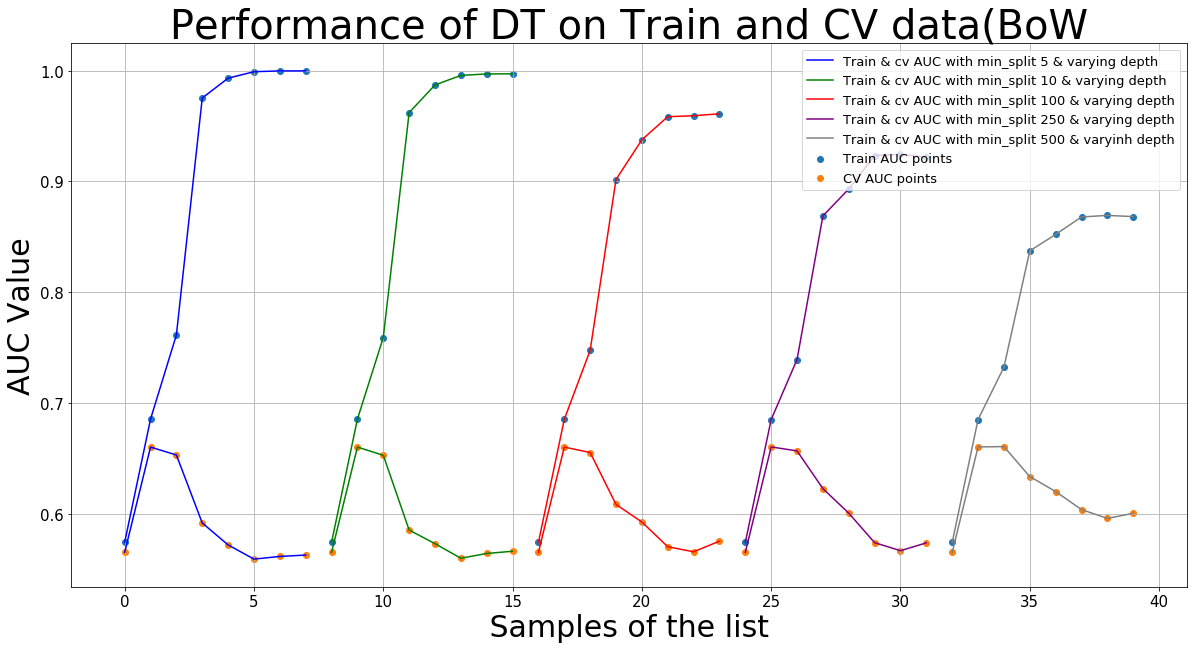

In [126]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_BoW[0:8], label='Train & cv AUC with min_split 5 & varying depth',color = "blue")
plt.plot(k[8:16],train_auc_BoW[8:16], label='Train & cv AUC with min_split 10 & varying depth',color = "green")
plt.plot(k[16:24],train_auc_BoW[16:24], label='Train & cv AUC with min_split 100 & varying depth',color = "red")
plt.plot(k[24:32],train_auc_BoW[24:32], label='Train & cv AUC with min_split 250 & varying depth',color = "purple")
plt.plot(k[32:40],train_auc_BoW[32:40], label='Train & cv AUC with min_split 500 & varyinh depth',color = "grey")

plt.plot(k[0:8],cv_auc_BoW[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_BoW[8:16],color = "green")
plt.plot(k[16:24],cv_auc_BoW[16:24],color = "red")
plt.plot(k[24:32],cv_auc_BoW[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_BoW[32:40],color = "grey")

plt.scatter(k,train_auc_BoW, label='Train AUC points')
plt.scatter(k,cv_auc_BoW, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 13},loc="upper right")
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of DT on Train and CV data(BoW",fontsize=40)
plt.grid()
plt.show()

***Observation from simultaneous hyperparameters tuning (plot above):***

1) From the Plot obtained above, for each value of  min_sample_split(5,10,100,250,500) hyperparameter and corresponding variation in depth hyperparameter, the AUC values of Train data keep increasing but AUC values of CV data attain peak of alomst similar value at depths of 5 and 10 and then falls down rapidly.

### 8.1.2. Heatmaps for Train data and Cv data Scores(BoW)

In [132]:
k = [x for x in range(0,40)]
for i in k:
    train_auc_BoW[i]= round(train_auc_BoW[i],3)

In [133]:
dt1 = [train_auc_BoW[0:8],train_auc_BoW[8:16], train_auc_BoW[16:24],train_auc_BoW[24:32],train_auc_BoW[32:40]]

In [134]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_BoW[i]= round(cv_auc_BoW[i],3)

In [135]:
dc1 = [cv_auc_BoW[0:8],cv_auc_BoW[8:16], cv_auc_BoW[16:24],cv_auc_BoW[24:32],cv_auc_BoW[32:40]]

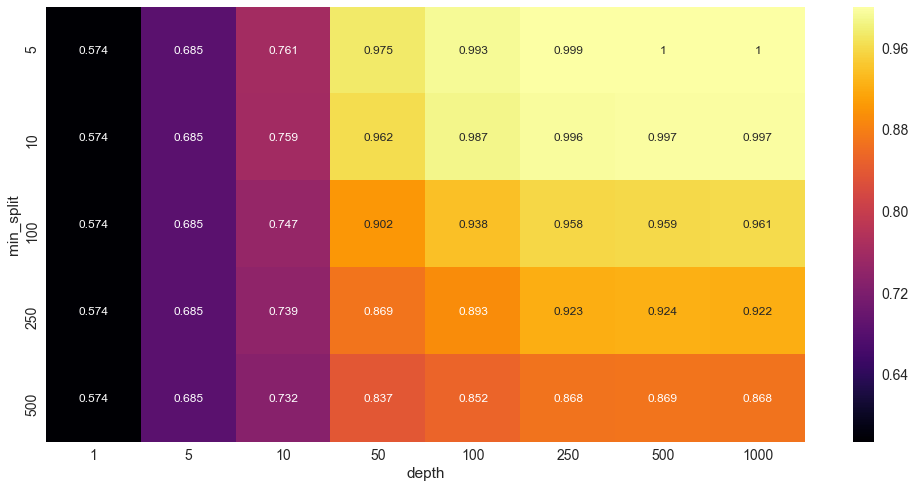

In [137]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dt1 = pd.DataFrame(dt1, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dt1.index.name = 'min_split'
dt1.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dt1, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

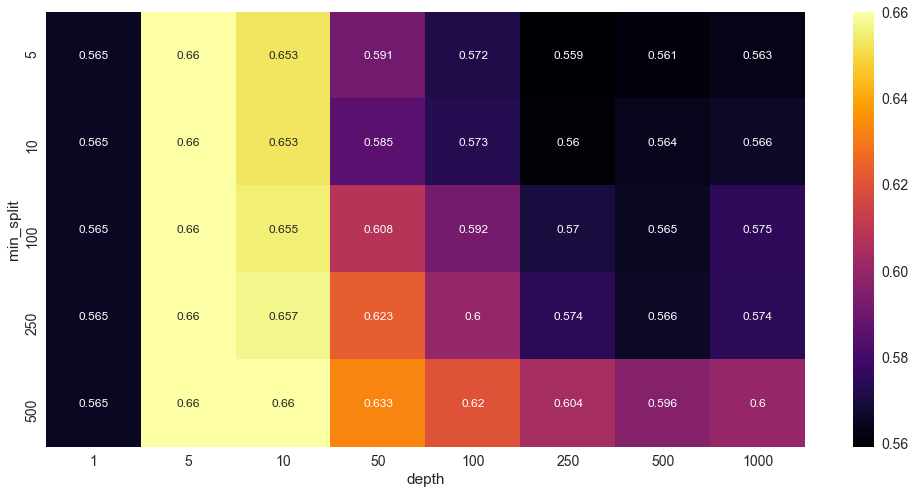

In [138]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dc1 = pd.DataFrame(d1, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dc1.index.name = 'min_split'
dc1.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dc1, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

***Observation from simultaneous hyperparameter tuning of cv data(heatmap above) :***

- From the heatmap obtained above, it is compelling to test the data with the depth hyperparameter at 5 and min_sample_split hyperparameter at 250, this is the optimal value in the CV data heatmap table without overfit corresponding to the scores in train heatmap table.

- In addition,the values are stabilized in the vicinity of depth = 5 and min_sample_split = 250.

### 8.1.3. Using the Optimal Hyperparameters 

In [148]:
tuned_depth = 5
tuned_sample_split = 250

In [149]:
print(X_train_bow.shape)

(49041, 6756)


In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight = "balanced", max_depth = tuned_depth,min_samples_split = tuned_sample_split, criterion="gini")
clf.fit(X_train_bow, y_train)

y_train_pred = batch_predict(clf, X_train_bow1)
print(len(y_train_pred))
y_test_pred = batch_predict(clf, X_test_bow1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

49041


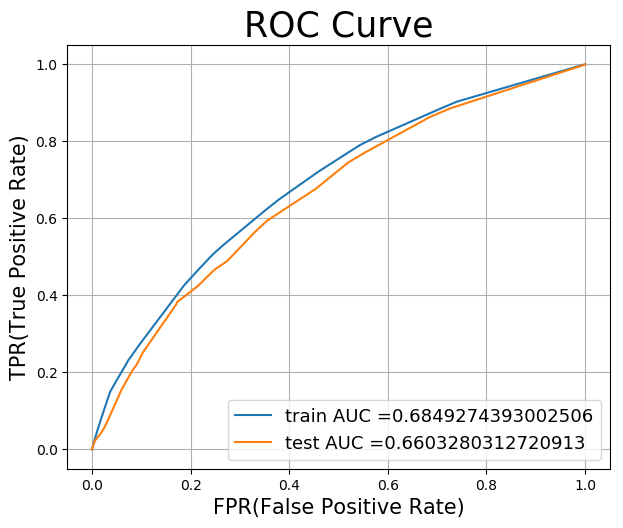

In [151]:
plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

In [156]:
import graphviz
from sklearn import tree
from graphviz import Source

data = tree.export_graphviz(clf, out_file=None, feature_names=feature_list_BoW1)
graph = graphviz.Source(data) 
graph.render("Bow tree",view = True)

'Bow tree.pdf'

In [152]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.40313459090565057 for threshold 0.503


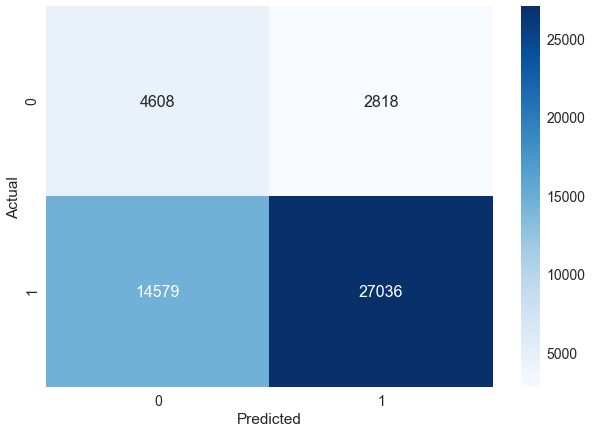

In [153]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.1331530591604476 for threshold 0.515


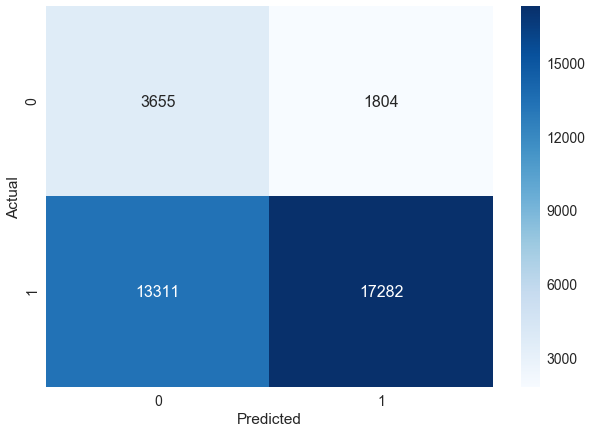

In [154]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, train_tpr, train_fpr) 
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

### 8.1.4. Word Cloud(FPR) of Essay Features(BoW)

In [240]:
#To extract the feature values of essay text 
vectorizer = CountVectorizer(min_df=10)
bow  = vectorizer.fit(X_train_preprocessed_essays)
Essay_features_BoW = bow.get_feature_names()

In [241]:
len(Essay_features_BoW)

12004

In [242]:
X_test_essay_text_bow1 = X_test_essay_text_bow.todense()
print(X_test_essay_text_bow.shape)

(36052, 5000)


In [243]:
y_test_actual_value = list(y_test[::])
print(len(y_test_actual_value))

36052


In [244]:
# Extracting the false positive indexes using difference in the actual(y_test) and predicted(y_test_pred)
index_false_positive = []

for i in range(len(y_test_pred)):
    if (y_test_actual_value[i] == 0 and y_test_pred[i] >= 0.431):
        index_false_positive.append(i)

In [245]:
print(len(index_false_positive))

2262


In [246]:
n = pd.DataFrame(X_test_essay_text_bow1)
FPR_in_essays = n.iloc[index_false_positive,:]
print(FPR_in_essays.shape)

(2262, 5000)


In [247]:

Weight_of_essay_indices = []

for j in range(5000):
    
    s = FPR_in_essays[j].sum()
    Weight_of_essay_indices.append(j)
   

In [248]:
len(Weight_of_essay_indices)

5000

In [249]:
words = []

for a in Weight_of_essay_indices:
    words.append(str(Essay_features_BoW[a]))

In [250]:
from wordcloud import WordCloud

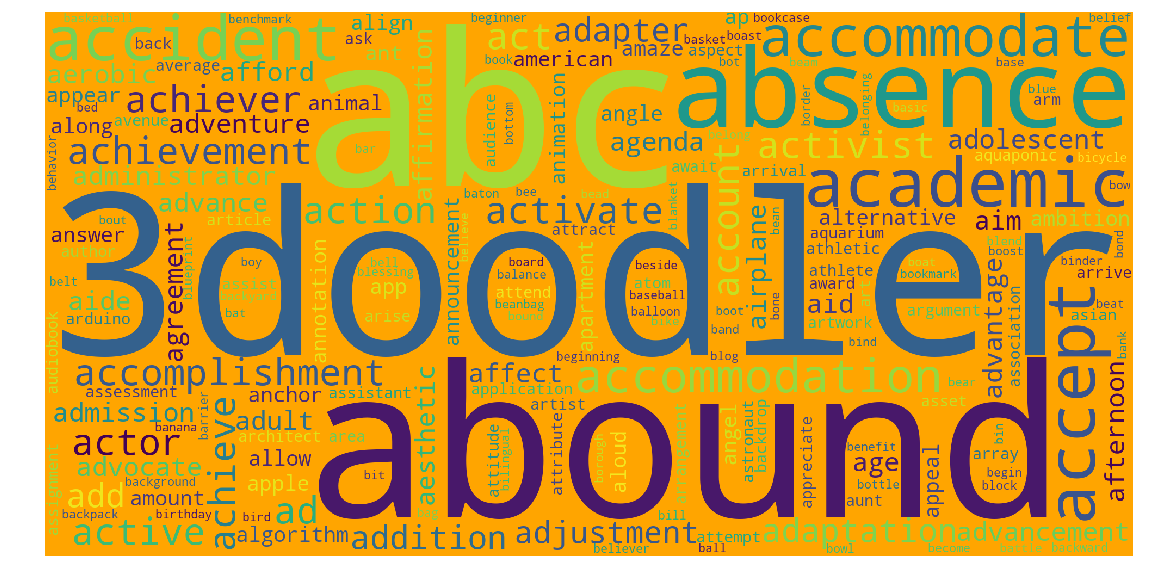

In [258]:
#convert list to string and generate
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 2000, height = 1000,background_color= "orange").generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

### 8.1.5 Box Plot of price features in FPR

In [372]:
n = pd.DataFrame(X_test["price"])
FPR_in_price = n.iloc[index_false_positive,:]

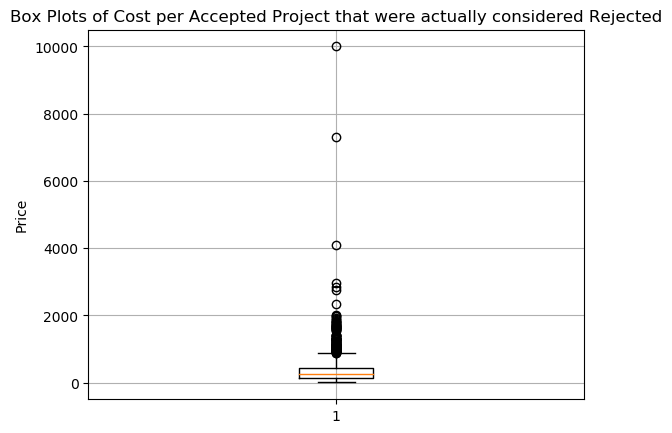

In [375]:
plt.boxplot(FPR_in_price.values)
plt.title('Box Plots of Cost per Accepted Project that were actually considered Rejected')

plt.ylabel('Price')
plt.grid()
plt.show()


### 8.1.6. Box Plot of Teacher Previously Posted in FPR

In [376]:
n = pd.DataFrame(X_test["teacher_number_of_previously_posted_projects"])
FPR_in_teahcers_previously_posted = n.iloc[index_false_positive,:]

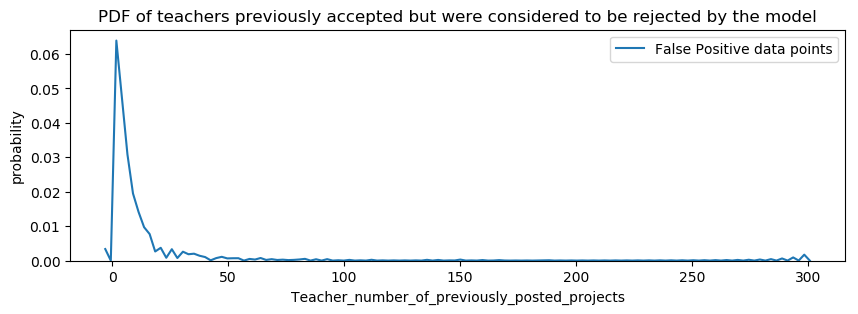

In [378]:
plt.figure(figsize=(10,3))
sns.distplot(FPR_in_teahcers_previously_posted.values, hist=False, label="False Positive data points")
plt.title('PDF of teachers previously accepted but were considered to be rejected by the model')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

In [166]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_tpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.45790350085277304 for threshold 0.478
[[ 5256  2170]
 [14692 26923]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.10751667645580493 for threshold 0.435
[[ 3186  2273]
 [10000 20593]]


### 8.2 Applying Linear SVM on TFIDF<font color='red'> SET 2</font>

In [139]:
T_train_tfidf1 = T_train_tfidf.tocsr()
T_cv_tfidf1 = T_cv_tfidf.tocsr()
T_test_tfidf1 = T_test_tfidf.tocsr()

### 8.2.1  Simultaneous Hyperparameter Tuning(TFIDF)

In [140]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


train_auc_TFIDF = []
cv_auc_TFIDF = []
K_split = [5, 10, 100, 250, 500]
Depth =  [1, 5, 10, 50, 100, 250, 500, 1000]

for i in K_split:
    for j in Depth:
        clf = DecisionTreeClassifier(min_samples_split = i ,max_depth = j,class_weight = "balanced")
        clf.fit(T_train_tfidf, y_train)
      
        y_train_pred = batch_predict(clf, T_train_tfidf1)
        
        y_cv_pred = batch_predict(clf, T_cv_tfidf1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_TFIDF.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_TFIDF.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

5
10
100
250
500


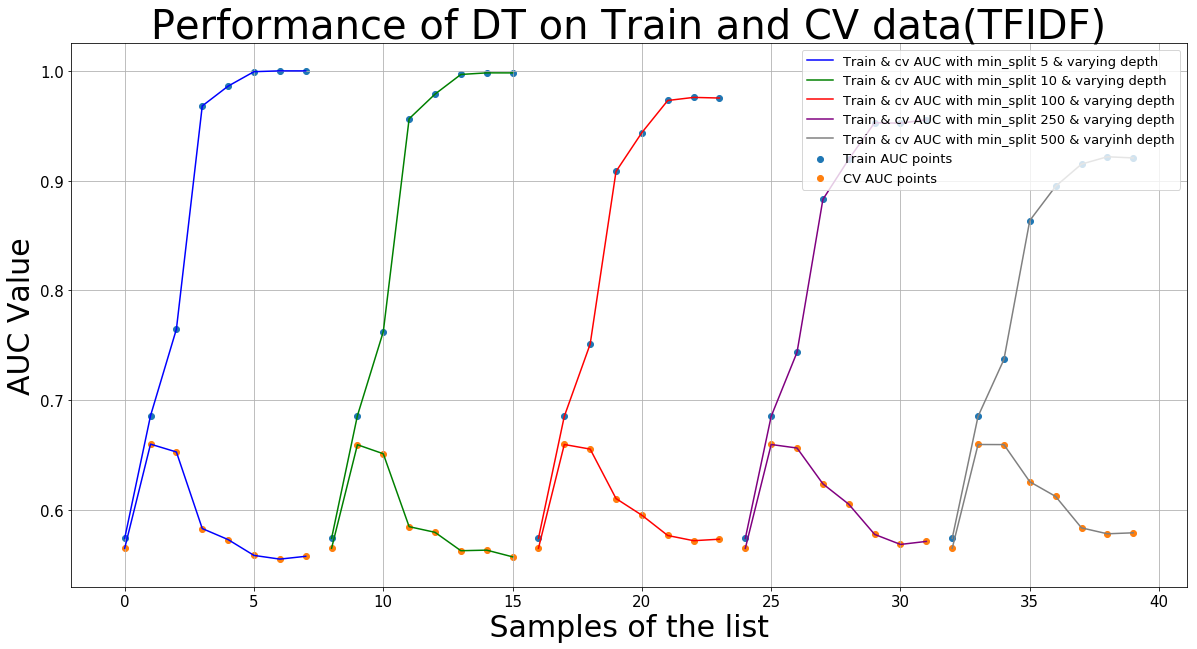

In [141]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_TFIDF[0:8], label='Train & cv AUC with min_split 5 & varying depth',color = "blue")
plt.plot(k[8:16],train_auc_TFIDF[8:16], label='Train & cv AUC with min_split 10 & varying depth',color = "green")
plt.plot(k[16:24],train_auc_TFIDF[16:24], label='Train & cv AUC with min_split 100 & varying depth',color = "red")
plt.plot(k[24:32],train_auc_TFIDF[24:32], label='Train & cv AUC with min_split 250 & varying depth',color = "purple")
plt.plot(k[32:40],train_auc_TFIDF[32:40], label='Train & cv AUC with min_split 500 & varyinh depth',color = "grey")

plt.plot(k[0:8],cv_auc_TFIDF[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_TFIDF[8:16],color = "green")
plt.plot(k[16:24],cv_auc_TFIDF[16:24],color = "red")
plt.plot(k[24:32],cv_auc_TFIDF[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_TFIDF[32:40],color = "grey")

plt.scatter(k,train_auc_TFIDF, label='Train AUC points')
plt.scatter(k,cv_auc_TFIDF, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 13},loc="upper right")
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of DT on Train and CV data(TFIDF)",fontsize=40)
plt.grid()
plt.show()

***Observation from simultaneous hyperparameters tuning (plot above):***

1) From the Plot obtained above, for each value of  min_sample_split(5,10,100,250,500) hyperparameter and corresponding variation in depth hyperparameter, the AUC scores of Train data keep increasing but AUC scores of CV data attain peak  at depth of 5 and then falls down rapidly.

### 8.2.2. Heatmaps for Train data and Cv data Scores (TFIDF)

In [142]:
k = [x for x in range(0,40)]
for i in k:
    train_auc_TFIDF[i]= round(train_auc_TFIDF[i],3)

In [143]:
dt2 = [train_auc_TFIDF[0:8],train_auc_TFIDF[8:16], train_auc_TFIDF[16:24],train_auc_TFIDF[24:32],train_auc_TFIDF[32:40]]

In [144]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_TFIDF[i]= round(cv_auc_TFIDF[i],3)

In [145]:
dc2 = [cv_auc_TFIDF[0:8],cv_auc_TFIDF[8:16], cv_auc_TFIDF[16:24],cv_auc_TFIDF[24:32],cv_auc_TFIDF[32:40]]

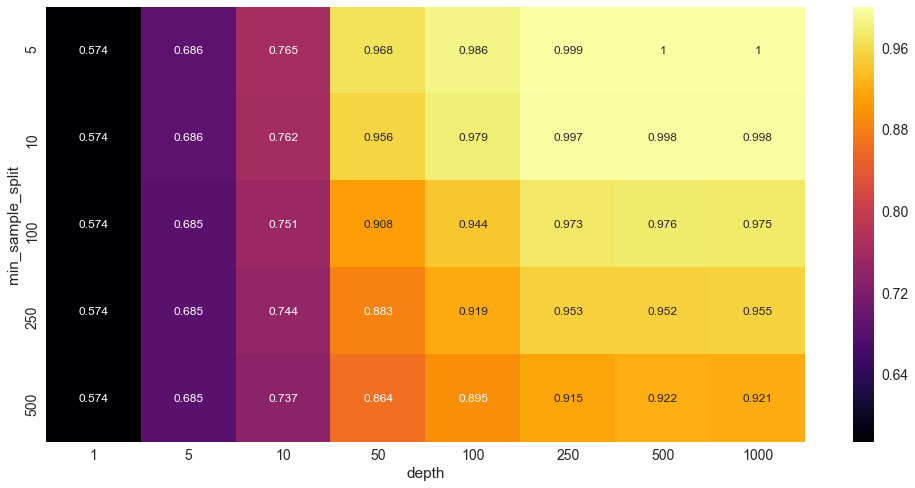

In [146]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dt2 = pd.DataFrame(dt2, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dt2.index.name = 'min_sample_split'
dt2.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dt2, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

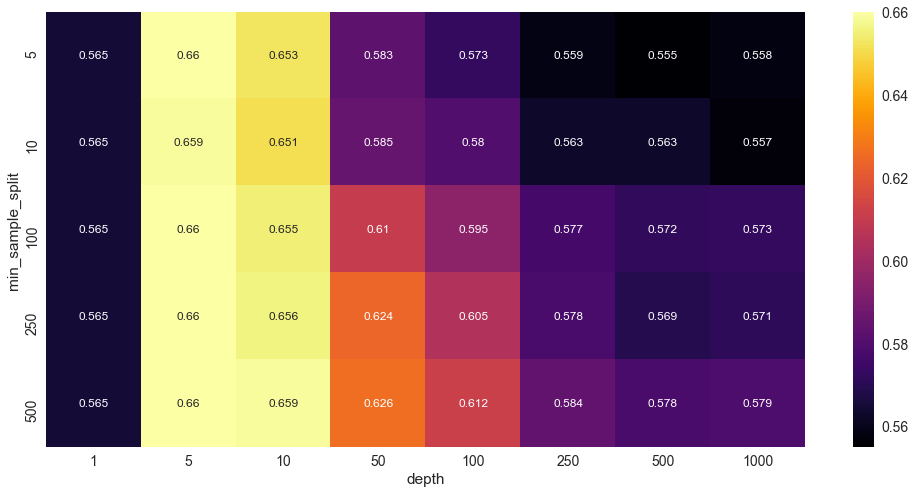

In [147]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dc2 = pd.DataFrame(dc2, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dc2.index.name = 'min_sample_split'
dc2.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dc2, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

***Observation from simultaneous hyperparameter tuning (heatmaps above) :***

- From the heatmap obtained above, it is compelling to test the data with the depth hyperparameter at 5 and min_sample_split hyperparameter at 250, this is the optimal value in the CV data heatmap table without overfit corresponding to the scores in train heatmap table.


- In addition,the values seems to be stabilized in the vicinity of depth = 5 and min_sample_split = 250.


### 8.2.3. Using Optimal Hyperparameters ( depth &  Min_sample_Split)

In [155]:
best_depth = 5
best_min_sample_split = 250

In [156]:
clf = DecisionTreeClassifier(class_weight = "balanced", max_depth = best_depth,min_samples_split = best_min_sample_split, criterion="gini")
clf.fit(T_train_tfidf, y_train)
    

y_train_pred = batch_predict(clf, T_train_tfidf1)
print(len(y_train_pred))
y_test_pred = batch_predict(clf, T_test_tfidf1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

49041


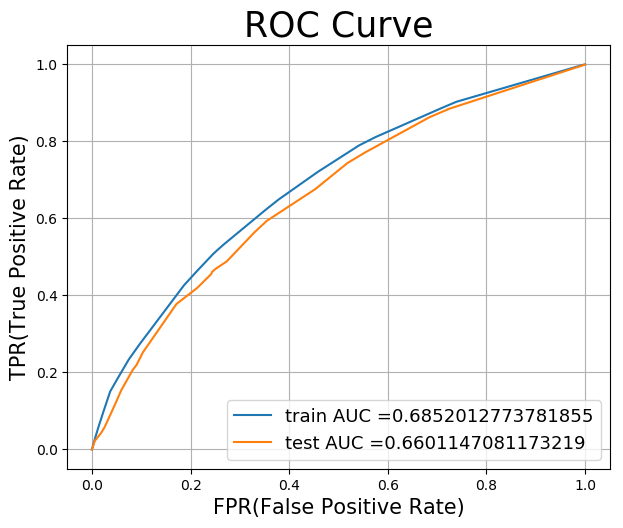

In [157]:

plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

In [262]:
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_list_TFIDF1)
graph = graphviz.Source(dot_data) 
graph.render("TIFIDF tree",view = True)

'TIFIDF tree.pdf'

the maximum value of tpr*(1-fpr) 0.40346961015391913 for threshold 0.503


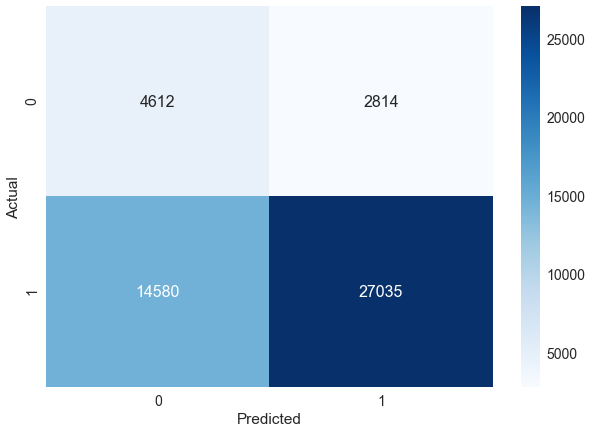

In [158]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.40346961015391913 for threshold 0.503


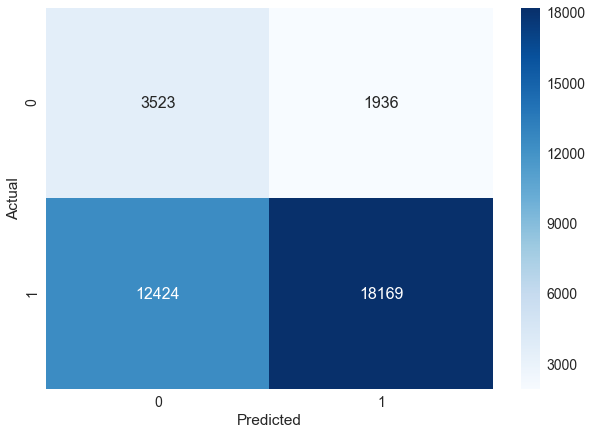

In [159]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

### 8.2.4. Word Cloud(FPR) of Essay Features(TFIDF)

In [265]:
#To extract the feature values of essay text 
vectorizer =TfidfVectorizer(min_df=10)
tfidf  = vectorizer.fit(X_train_preprocessed_essays)
Essay_features_TFIDF = tfidf.get_feature_names()

In [266]:
len(Essay_features_TFIDF)

12004

In [267]:
T_test_essay_text_tfidf1 = T_test_essay_text_tfidf.todense()
print(T_test_essay_text_tfidf1.shape)

(36052, 5000)


In [268]:
y_test_value = list(y_test[::])
print(len(y_test_value))

36052


In [269]:
# Extracting the false positive indexes using difference in the actual(y_test) and predicted(y_test_pred)
index_false_positive = []

for i in range(len(y_test_pred)):
    if (y_test_value[i] == 0 and y_test_pred[i] >= 0.505):
        index_false_positive.append(i)

In [270]:
print(len(index_false_positive))

1962


In [271]:
n = pd.DataFrame(X_test_essay_text_bow1)
FPR_in_essays = n.iloc[index_false_positive,:]
print(FPR_in_essays.shape)

(1962, 5000)


In [272]:

Weight_of_essay_indices = []

for j in range(5000):
    
    s = FPR_in_essays[j].sum()
    Weight_of_essay_indices.append(j)
   

In [273]:
words = []

for a in Weight_of_essay_indices:
    words.append(str(Essay_features_TFIDF[a]))

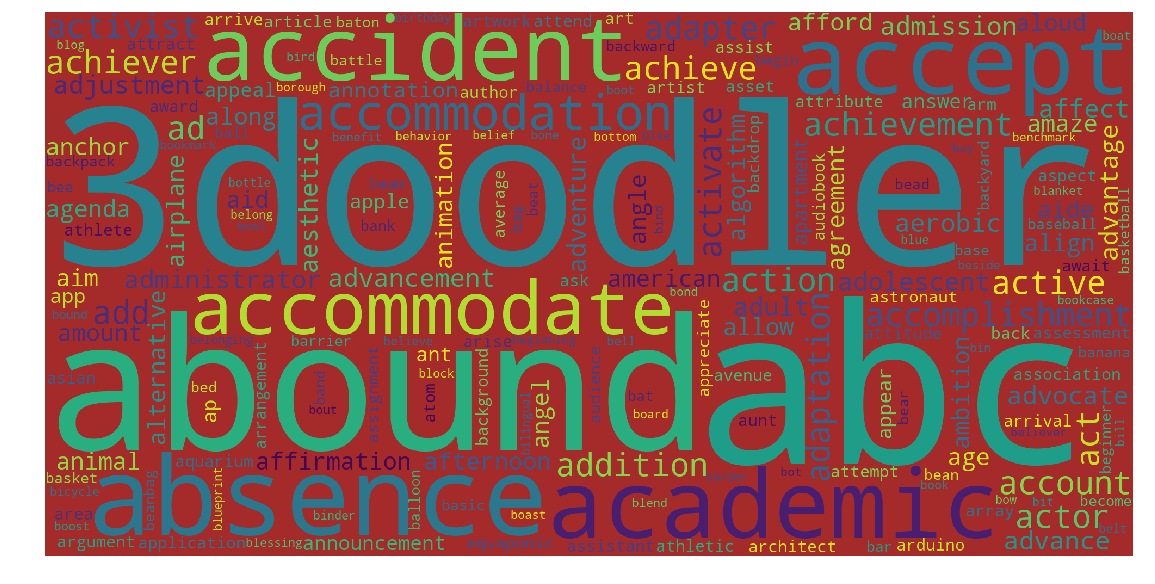

In [274]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 2000, height = 1000,background_color= "brown").generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

### 8.2.5. Box Plot of price features in FPR

In [191]:
n = pd.DataFrame(X_test["price"])
FPR_in_price = n.iloc[index_false_positive,:]

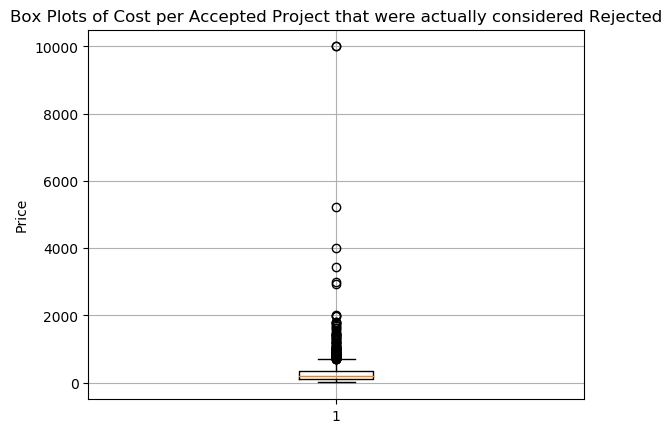

In [193]:
plt.style.use('default')
plt.boxplot(FPR_in_price.values)
plt.title('Box Plots of Cost per Accepted Project that were actually considered Rejected')

plt.ylabel('Price')
plt.grid()
plt.show()


### 8.2.6. Box Plot of Teacher Previously Posted

In [194]:
n = pd.DataFrame(X_test["teacher_number_of_previously_posted_projects"])
FPR_in_teahcers_previously_posted = n.iloc[index_false_positive,:]

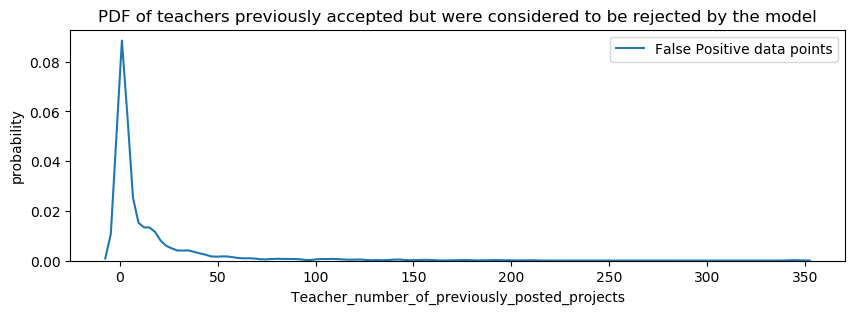

In [195]:
plt.figure(figsize=(10,3))
sns.distplot(FPR_in_teahcers_previously_posted.values, hist=False, label="False Positive data points")
plt.title('PDF of teachers previously accepted but were considered to be rejected by the model')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

In [114]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.400526057104777 for threshold 0.513
[[ 4853  2573]
 [16110 25505]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.400526057104777 for threshold 0.513
[[ 3220  2239]
 [12783 17810]]


### 8.3 Applying DT on AVG_W2V<font color='red'> SET 3</font>

In [178]:
A_train_avg_w2v1 = A_train_avg_w2v.tocsr()
A_cv_avg_w2v1 = A_cv_avg_w2v.tocsr()
A_test_avg_w2v1 = A_test_avg_w2v.tocsr()


### 8.3.1  Simultaneous Hyperparameter Tuning(Avg_W2V)

In [179]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


train_auc_avg_w2v = []
cv_auc_avg_w2v = []
K_split = [5, 10, 100, 250, 500]
Depth =  [1, 5, 10, 50, 100, 250, 500, 1000]

for i in K_split:
    for j in Depth:
        clf = DecisionTreeClassifier(min_samples_split = i ,max_depth = j,class_weight = "balanced")
        clf.fit(A_train_avg_w2v, y_train)
      
        y_train_pred = batch_predict(clf, A_train_avg_w2v1)
        
        y_cv_pred = batch_predict(clf, A_cv_avg_w2v1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_avg_w2v.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_avg_w2v.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

5
10
100
250
500


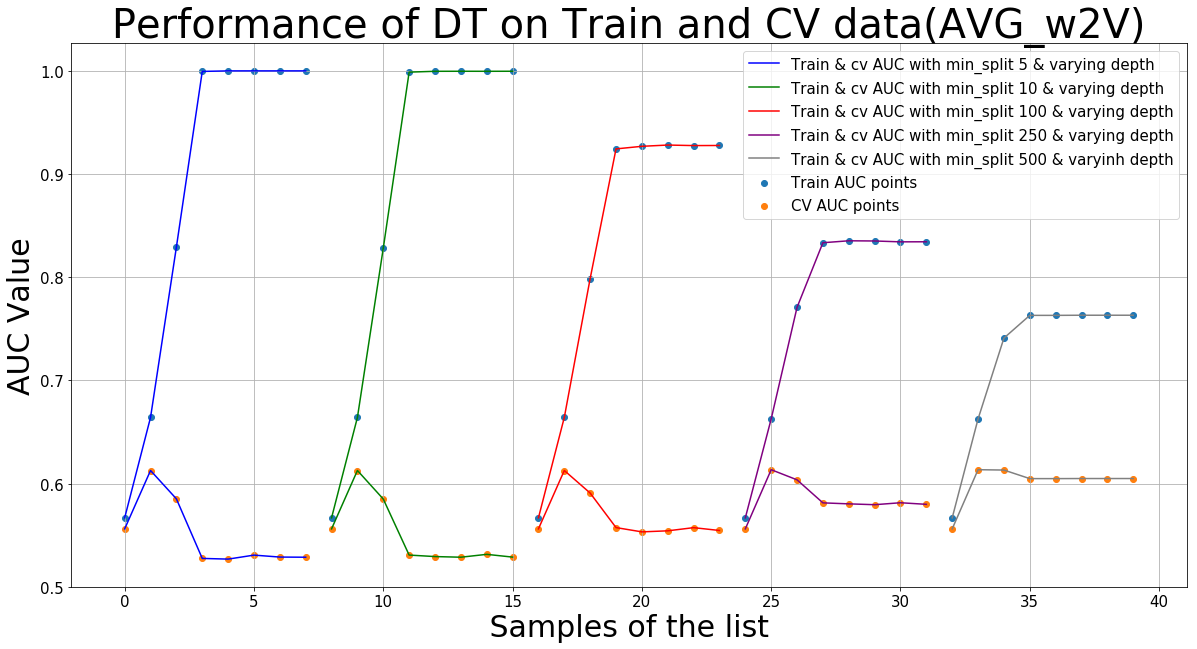

In [180]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_avg_w2v[0:8], label='Train & cv AUC with min_split 5 & varying depth',color = "blue")
plt.plot(k[8:16],train_auc_avg_w2v[8:16], label='Train & cv AUC with min_split 10 & varying depth',color = "green")
plt.plot(k[16:24],train_auc_avg_w2v[16:24], label='Train & cv AUC with min_split 100 & varying depth',color = "red")
plt.plot(k[24:32],train_auc_avg_w2v[24:32], label='Train & cv AUC with min_split 250 & varying depth',color = "purple")
plt.plot(k[32:40],train_auc_avg_w2v[32:40], label='Train & cv AUC with min_split 500 & varyinh depth',color = "grey")

plt.plot(k[0:8],cv_auc_avg_w2v[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_avg_w2v[8:16],color = "green")
plt.plot(k[16:24],cv_auc_avg_w2v[16:24],color = "red")
plt.plot(k[24:32],cv_auc_avg_w2v[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_avg_w2v[32:40],color = "grey")

plt.scatter(k,train_auc_avg_w2v, label='Train AUC points')
plt.scatter(k,cv_auc_avg_w2v, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 15},loc="upper right")
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of DT on Train and CV data(AVG_w2V)",fontsize=40)
plt.grid()
plt.show()

***Observation from simultaneous hyperparameters tuning (plot above):***

1) From the Plot obtained above, for each value of  min_sample_split(5,10,100,250,500) hyperparameter and corresponding variation in depth hyperparameter, the AUC scores of Train data keep increasing but AUC scores of CV data attain peak  at depth of 5 and then falls down rapidly.

### 8.3.2. Heatmaps for Train data and Cv data Scores

In [185]:
k = [x for x in range(0,40)]
for i in k:
    train_auc_avg_w2v[i]= round(train_auc_avg_w2v[i],3)

In [186]:
dt3 = [train_auc_avg_w2v[0:8],train_auc_avg_w2v[8:16], train_auc_avg_w2v[16:24],train_auc_avg_w2v[24:32],train_auc_avg_w2v[32:40]]

In [187]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_avg_w2v[i]= round(cv_auc_avg_w2v[i],3)

In [188]:
dc3 = [cv_auc_avg_w2v[0:8],cv_auc_avg_w2v[8:16], cv_auc_avg_w2v[16:24],cv_auc_avg_w2v[24:32],cv_auc_avg_w2v[32:40]]

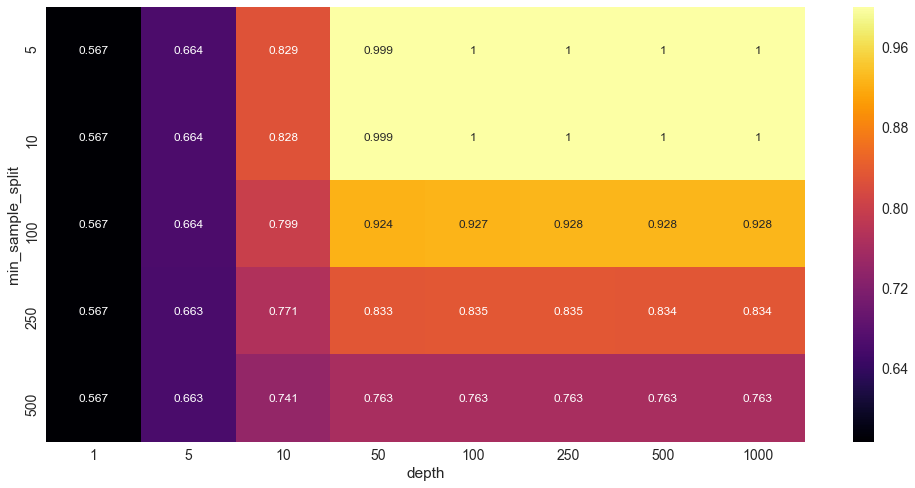

In [189]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dt3 = pd.DataFrame(dt3, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dt3.index.name = 'min_sample_split'
dt3.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dt3, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

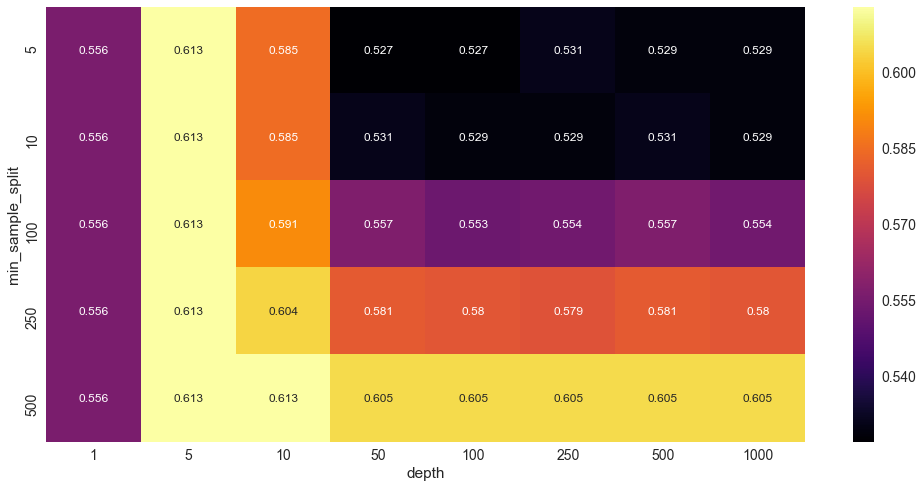

In [190]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dc3 = pd.DataFrame(dc3, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dc3.index.name = 'min_sample_split'
dc3.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dc3, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

***Observation from simultaneous hyperparameter tuning (heatmap above) :***

1) From the heatmap obtained above, it is compelling to test the data with the depth hyperparameter at 5 and min_sample_split hyperparameter at 250, although the this AuC Score in the heatmap is optimal but with increase in depth and increase in min_sample_split  could lead to overfit on a unseen data.

2) As the min_sample_split keeps increasing more number of data points remain unclassified at the bottom of the leaf, as it takes atleast min_sample_split number of data points for splitting the tree.

3) The values seems to be stabilized in the vicinity of depth = 5 and min_sample_split = 250.

4) The Overfit could arraise if the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

### 8.3.3. Using Optimal Hyperparameters

In [195]:
best_depth = 5
best_min_sample_split = 250

In [196]:
clf = DecisionTreeClassifier(class_weight = "balanced", max_depth = best_depth,min_samples_split = best_min_sample_split, criterion="gini")
clf.fit(A_train_avg_w2v, y_train)
    

y_train_pred = batch_predict(clf, A_train_avg_w2v1)
print(len(y_train_pred))
y_test_pred = batch_predict(clf, A_test_avg_w2v1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

49041


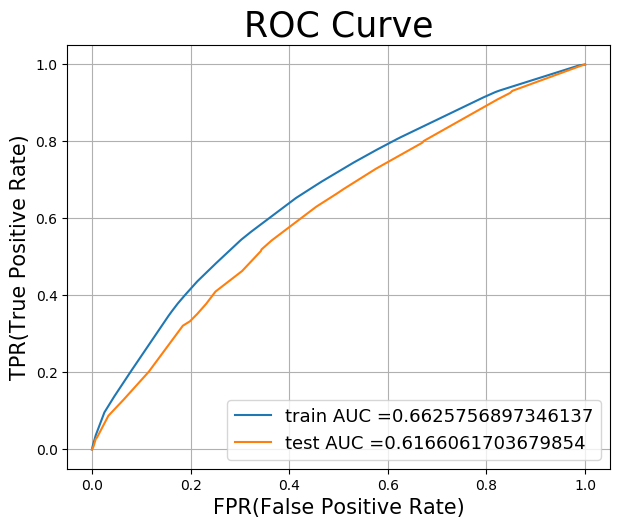

In [193]:

plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.3829879133616123 for threshold 0.507


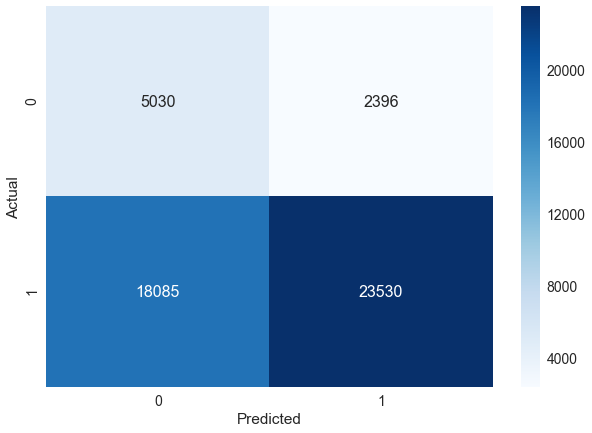

In [197]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.3829879133616123 for threshold 0.507


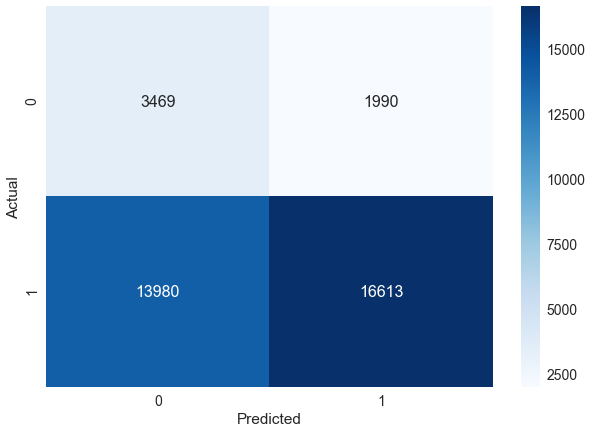

In [198]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

### 8.4 Applying DT on TFIDF_W2V<font color='red'> SET 4</font>

In [199]:
L_train_Tfidf_avg_w2v1 = L_train_Tfidf_avg_w2v.tocsr()
L_cv_Tfidf_avg_w2v1 = L_cv_Tfidf_avg_w2v.tocsr()
L_test_Tfidf_avg_w2v1 = L_test_Tfidf_avg_w2v.tocsr()

### 8.4.1  Simultaneous Hyperparameter Tuning(TFIDF_W2V)

In [200]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


train_auc_TFIDF_w2v = []
cv_auc_TFIDF_w2v = []

K_split = [5, 10, 100, 250, 500]
Depth =  [1, 5, 10, 50, 100, 250, 500, 1000]


for i in K_split:
    
    for j in Depth:
        clf = DecisionTreeClassifier(min_samples_split = i ,max_depth = j,class_weight = "balanced")
        clf.fit(L_train_Tfidf_avg_w2v, y_train)
      
        y_train_pred = batch_predict(clf, L_train_Tfidf_avg_w2v1)
        
        y_cv_pred = batch_predict(clf, L_cv_Tfidf_avg_w2v1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_TFIDF_w2v.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_TFIDF_w2v.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

5
10
100
250
500


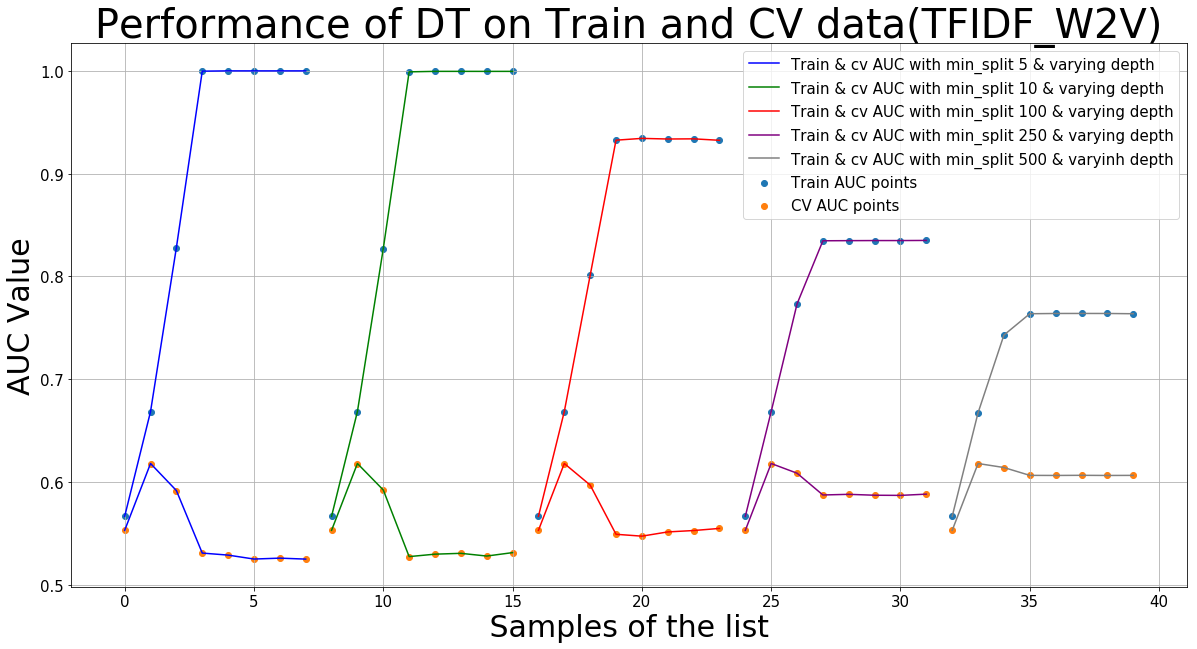

In [201]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_TFIDF_w2v[0:8], label='Train & cv AUC with min_split 5 & varying depth',color = "blue")
plt.plot(k[8:16],train_auc_TFIDF_w2v[8:16], label='Train & cv AUC with min_split 10 & varying depth',color = "green")
plt.plot(k[16:24],train_auc_TFIDF_w2v[16:24], label='Train & cv AUC with min_split 100 & varying depth',color = "red")
plt.plot(k[24:32],train_auc_TFIDF_w2v[24:32], label='Train & cv AUC with min_split 250 & varying depth',color = "purple")
plt.plot(k[32:40],train_auc_TFIDF_w2v[32:40], label='Train & cv AUC with min_split 500 & varyinh depth',color = "grey")

plt.plot(k[0:8],cv_auc_TFIDF_w2v[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_TFIDF_w2v[8:16],color = "green")
plt.plot(k[16:24],cv_auc_TFIDF_w2v[16:24],color = "red")
plt.plot(k[24:32],cv_auc_TFIDF_w2v[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_TFIDF_w2v[32:40],color = "grey")

plt.scatter(k,train_auc_TFIDF_w2v, label='Train AUC points')
plt.scatter(k,cv_auc_TFIDF_w2v, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 15},loc="upper right")
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of DT on Train and CV data(TFIDF_W2V)",fontsize=40)
plt.grid()
plt.show()

***Observation from simultaneous hyperparameters tuning (plot above):***

1) From the Plot obtained above, for each value of  min_sample_split(5,10,100,250,500) hyperparameter and corresponding variation in depth hyperparameter, the AUC scores of Train data keep increasing but AUC scores of CV data attain peak  at depth of 5 and then falls down rapidly.

### 8.4.2. Heatmaps for Train data and Cv data Scores(TFIDF_W2V)

In [202]:
k = [x for x in range(0,40)]
for i in k:
    train_auc_TFIDF_w2v[i]= round(train_auc_TFIDF_w2v[i],3)

In [203]:
dt4 = [train_auc_TFIDF_w2v[0:8],train_auc_TFIDF_w2v[8:16], train_auc_TFIDF_w2v[16:24],train_auc_TFIDF_w2v[24:32],train_auc_TFIDF_w2v[32:40]]

In [204]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_TFIDF_w2v[i]= round(cv_auc_TFIDF_w2v[i],3)

In [205]:
dc4 = [cv_auc_TFIDF_w2v[0:8],cv_auc_TFIDF_w2v[8:16], cv_auc_TFIDF_w2v[16:24],cv_auc_TFIDF_w2v[24:32],cv_auc_TFIDF_w2v[32:40]]

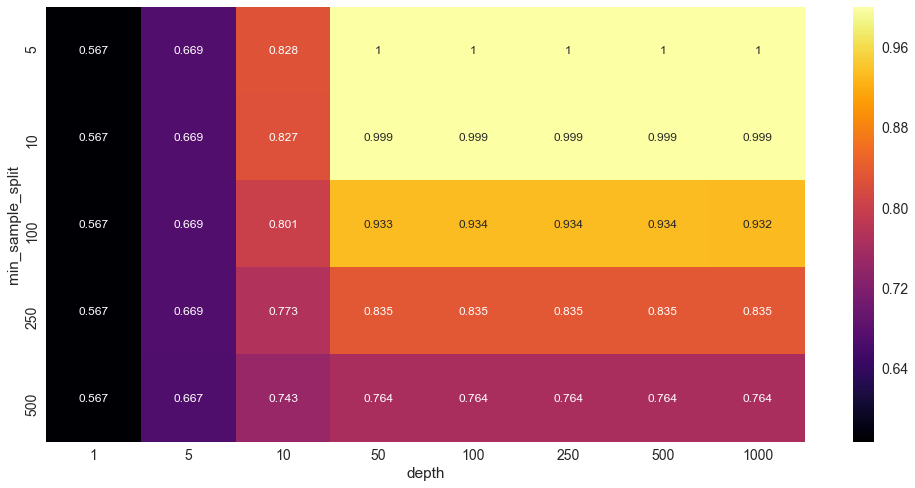

In [206]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dt4 = pd.DataFrame(dt4, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dt4.index.name = 'min_sample_split'
dt4.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dt4, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

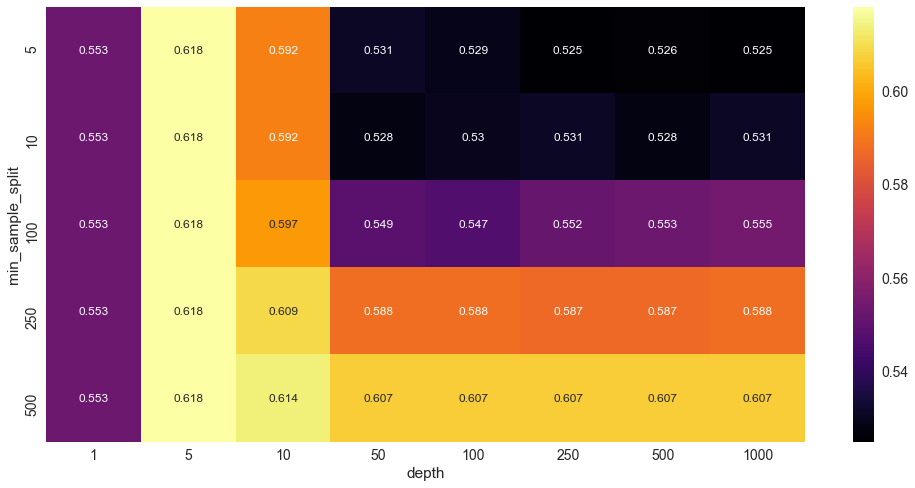

In [207]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dc4 = pd.DataFrame(dc4, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dc4.index.name = 'min_sample_split'
dc4.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dc4, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

***Observation from simultaneous hyperparameter tuning (heatmap above) :***

1) From the heatmap obtained above, it is compelling to test the data with the depth hyperparameter at 5 and min_sample_split hyperparameter at 250, although the this AuC Score in the heatmap is optimal but with increase in depth and increase in min_sample_split  could lead to overfit on a unseen data.

3) As the min_sample_split keeps increasing more number of data points remain unclassified at the bottom of the leaf, as it takes atleast min_sample_split number of data points for splitting the tree.

3) In addition, values are stabilized in the vicinity of depth = 5 and min_sample_split = 250.

2) The Overfit could arraise if the difference between the AUC scores of Train and CV data points is high. These results could seem interesting but the their performance on unseen or test data could be lower than anticipated.

#### 8.4.3.Using Optimal Hyperparameters

In [208]:
clf = DecisionTreeClassifier(class_weight = "balanced", max_depth = 5,min_samples_split = 250, criterion="gini")
clf.fit(L_train_Tfidf_avg_w2v, y_train)
    

y_train_pred = batch_predict(clf, L_train_Tfidf_avg_w2v1)
print(len(y_train_pred))
y_test_pred = batch_predict(clf, L_test_Tfidf_avg_w2v1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

49041


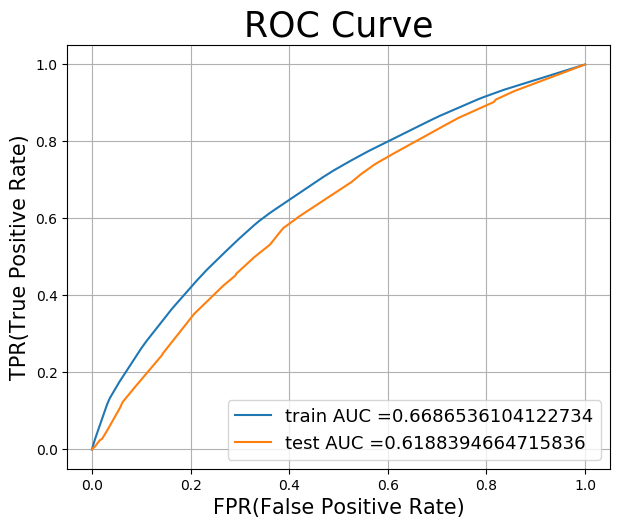

In [209]:

plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.3926401191018474 for threshold 0.489


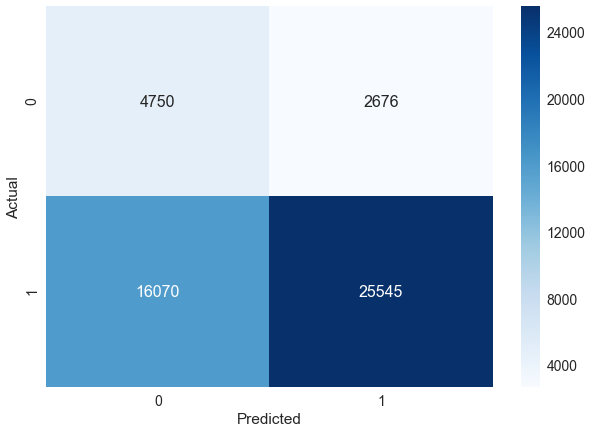

In [210]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.3926401191018474 for threshold 0.489


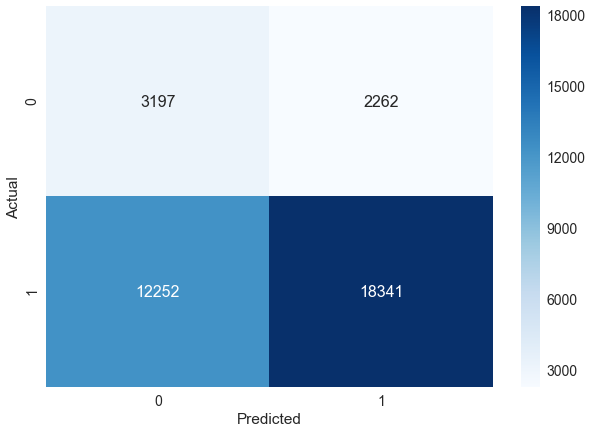

In [211]:
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [212]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3926401191018474 for threshold 0.489
[[ 4750  2676]
 [16070 25545]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3926401191018474 for threshold 0.489
[[ 3197  2262]
 [12252 18341]]


### 8.5 Applying DT on ,<font color='red'> SET 5</font>

### 8.5.1  Simultaneous Hyperparameter Tuning

In [222]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


train_auc_TFIDF_set_5 = []
cv_auc_TFIDF_set_5 = []

K_split = [5, 10, 100, 250, 500]
Depth =  [1, 5, 10, 50, 100, 250, 500, 1000]

for i in K_split:
    for j in Depth:
        clf = DecisionTreeClassifier(min_samples_split = i ,max_depth = j,class_weight = "balanced")
        clf.fit(T_train_tfidf_set_set5, y_train)
      
        y_train_pred = batch_predict(clf, T_train_tfidf_set_set5)
        
        y_cv_pred = batch_predict(clf, T_cv_tfidf_set_set5)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc_TFIDF_set_5.append(roc_auc_score(y_train,y_train_pred))
        cv_auc_TFIDF_set_5.append(roc_auc_score(y_cv, y_cv_pred))
    print(i)

5
10
100
250
500


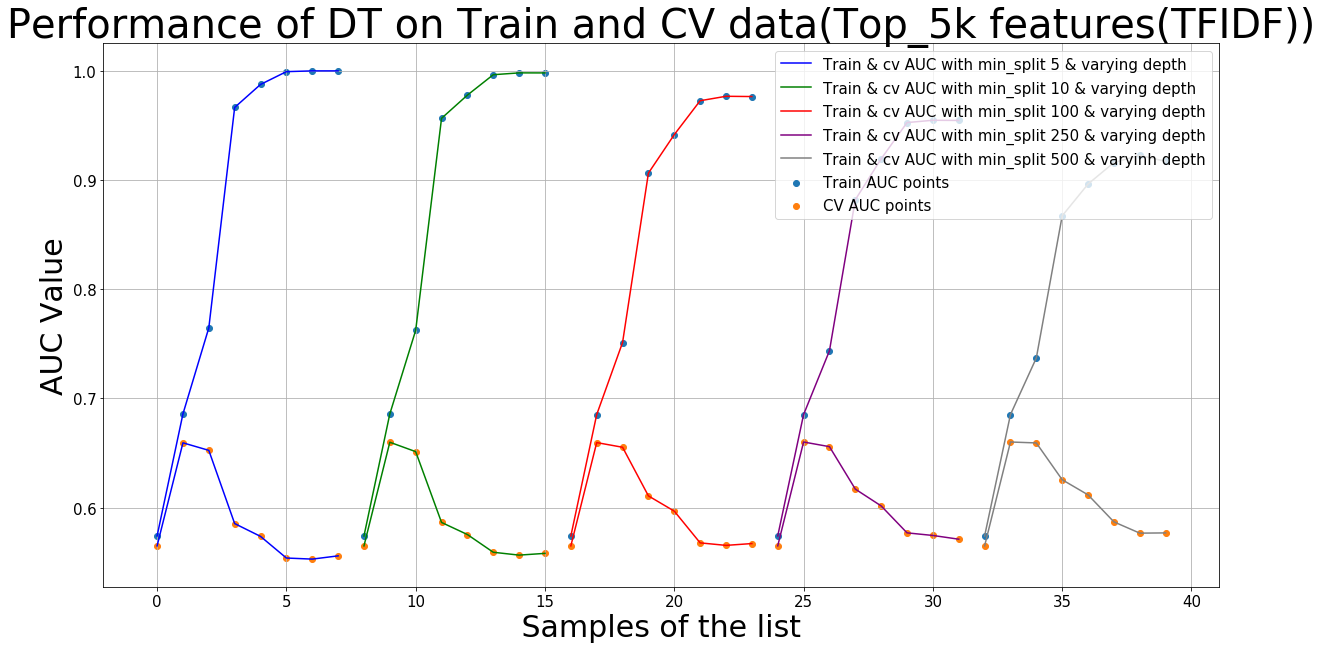

In [223]:
import math
k = [x for x in range(0,40)]
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(k[0:8],train_auc_TFIDF_set_5[0:8], label='Train & cv AUC with min_split 5 & varying depth',color = "blue")
plt.plot(k[8:16],train_auc_TFIDF_set_5[8:16], label='Train & cv AUC with min_split 10 & varying depth',color = "green")
plt.plot(k[16:24],train_auc_TFIDF_set_5[16:24], label='Train & cv AUC with min_split 100 & varying depth',color = "red")
plt.plot(k[24:32],train_auc_TFIDF_set_5[24:32], label='Train & cv AUC with min_split 250 & varying depth',color = "purple")
plt.plot(k[32:40],train_auc_TFIDF_set_5[32:40], label='Train & cv AUC with min_split 500 & varyinh depth',color = "grey")

plt.plot(k[0:8],cv_auc_TFIDF_set_5[0:8],color = "blue")
plt.plot(k[8:16],cv_auc_TFIDF_set_5[8:16],color = "green")
plt.plot(k[16:24],cv_auc_TFIDF_set_5[16:24],color = "red")
plt.plot(k[24:32],cv_auc_TFIDF_set_5[24:32],color = "purple")
plt.plot(k[32:40],cv_auc_TFIDF_set_5[32:40],color = "grey")

plt.scatter(k,train_auc_TFIDF_set_5, label='Train AUC points')
plt.scatter(k,cv_auc_TFIDF_set_5, label='CV AUC points')
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 15},loc="upper right")
plt.xlabel(" Samples of the list ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of DT on Train and CV data(Top_5k features(TFIDF))",fontsize=40)
plt.grid()
plt.show()

***Observation from simultaneous hyperparameters tuning (plot above):***

1) From the Plot obtained above, for each value of  min_sample_split(5,10,100,250,500) hyperparameter and corresponding variation in depth hyperparameter, the AUC scores of Train data keep increasing but AUC scores of CV data attain peak  at depth of 5 and then falls down rapidly.

### 8.5.2. Heatmaps for Train data and Cv data Scores

In [224]:
k = [x for x in range(0,40)]
for i in k:
    train_auc_TFIDF_set_5[i]= round(train_auc_TFIDF_set_5[i],3)

In [225]:
dt5 = [train_auc_TFIDF_set_5[0:8],train_auc_TFIDF_set_5[8:16], train_auc_TFIDF_set_5[16:24],train_auc_TFIDF_set_5[24:32],train_auc_TFIDF_set_5[32:40]]

In [226]:
k = [x for x in range(0,40)]
for i in k:
    cv_auc_TFIDF_set_5[i]= round(cv_auc_TFIDF_set_5[i],3)

In [227]:
dc5 = [cv_auc_TFIDF_set_5[0:8],cv_auc_TFIDF_set_5[8:16], cv_auc_TFIDF_set_5[16:24],cv_auc_TFIDF_set_5[24:32],cv_auc_TFIDF_set_5[32:40]]

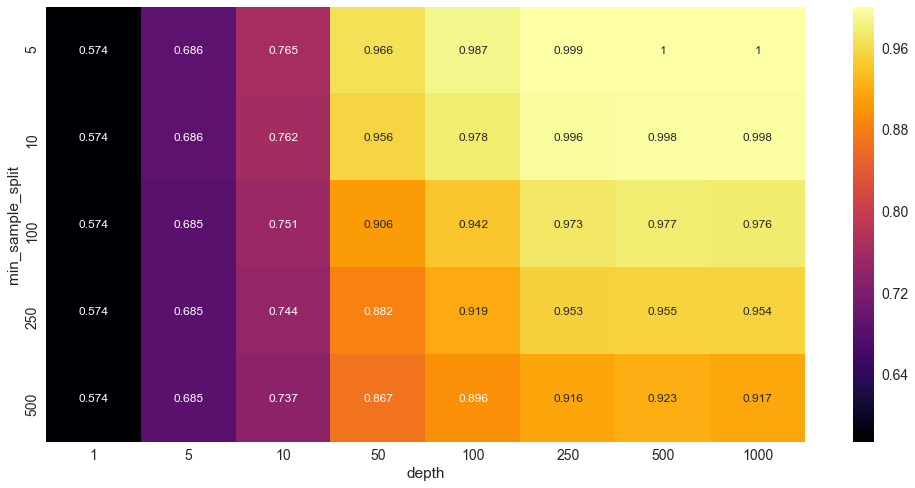

In [228]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dt5 = pd.DataFrame(dt5, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dt5.index.name = 'min_sample_split'
dt5.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dt5, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

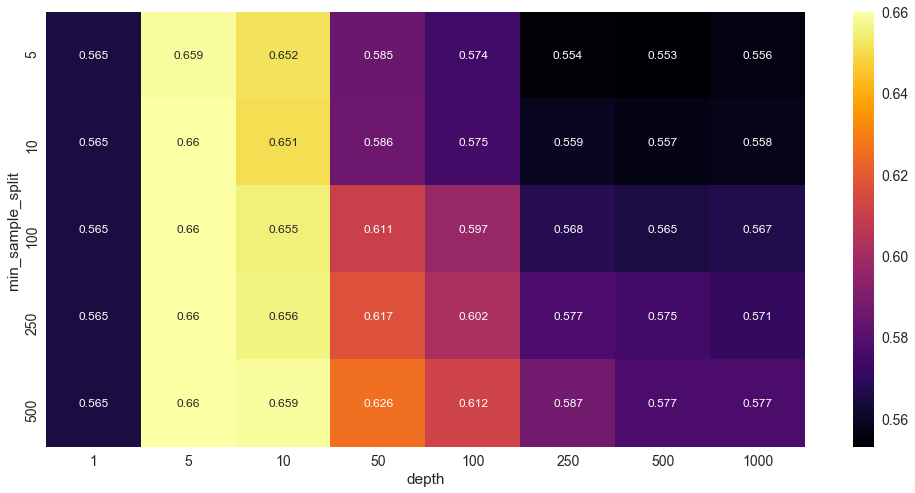

In [229]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
dc5 = pd.DataFrame(dc5, columns=[1, 5, 10, 50, 100, 250, 500, 1000], index =[5, 10, 100, 250, 500])
dc5.index.name = 'min_sample_split'
dc5.columns.name = 'depth'
plt.figure(figsize = (17,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dc5, cmap="inferno", annot=True,annot_kws={"size": 12},fmt='g')# font size

***Observation from simultaneous hyperparameter tuning (heatmap above) :***

- From the heatmap obtained above, it is compelling to test the data with the depth hyperparameter at 5 and min_sample_split hyperparameter at 250, although the this AuC Score in the heatmap is optimal but with increase in depth and increase in min_sample_split  could lead to overfit on a unseen data.

- The values seems to be stabilized in the vicinity of depth = 5 and min_sample_split = 250.

### 8.5.3. Using Optimal Hyperparameters

In [230]:
clf = DecisionTreeClassifier(class_weight = "balanced", max_depth = 5, min_samples_split = 250 , criterion="gini")
clf.fit(T_train_tfidf_set_set5, y_train)
    

y_train_pred = batch_predict(clf, T_train_tfidf_set_set5)
print(len(y_train_pred))
y_test_pred = batch_predict(clf, T_test_tfidf_set_set5)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

49041


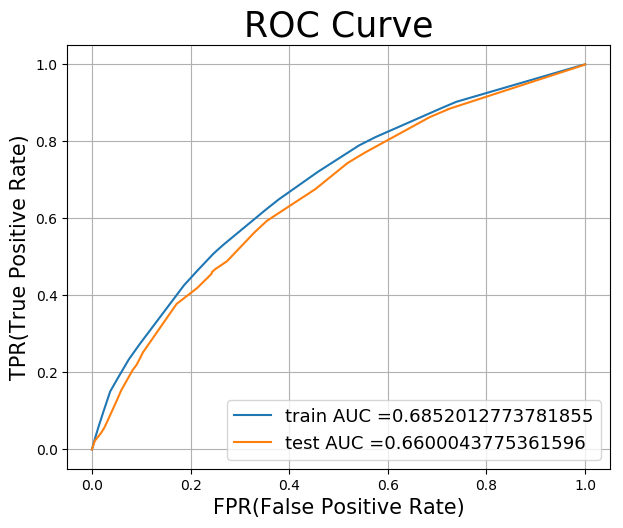

In [231]:
plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.40346961015391913 for threshold 0.503


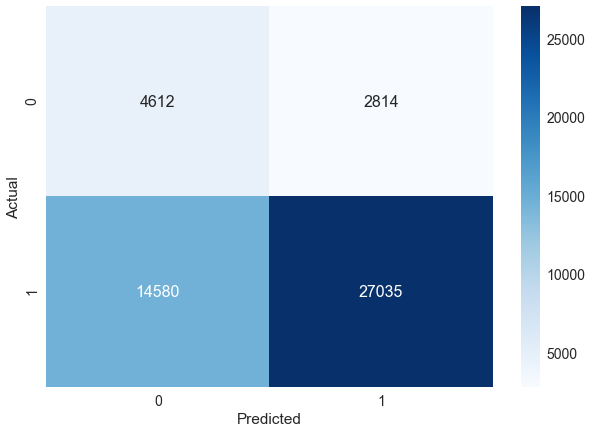

In [237]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.40346961015391913 for threshold 0.503


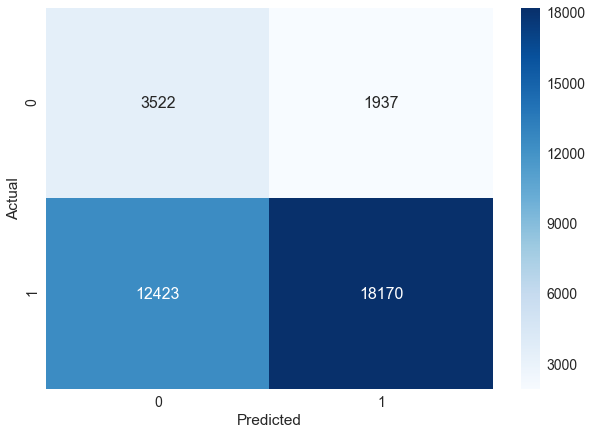

In [233]:
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [234]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.40346961015391913 for threshold 0.503
[[ 4612  2814]
 [14580 27035]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40346961015391913 for threshold 0.503
[[ 3522  1937]
 [12423 18170]]


<h1>9. Conclusions</h1>

In [235]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Type of Vectorizer", "Optimal_Depth","optimal_min_split", "Train_AUC","Test_AUC"]
x.add_row(["BoW", 5,250,0.6849,0.6603])
x.add_row(["TFIDF", 5,250, 0.6852,0.6601])
x.add_row(["AVG W2V",5,250, 0.6625, 0.6166])
x.add_row(["TFIDF weighted W2V",5,250, 0.6686, 0.6188])
x.add_row(["Top 5000 features(TFIDF)",5,250, 0.6852, 0.6600])

print(x)

+--------------------------+---------------+-------------------+-----------+----------+
|    Type of Vectorizer    | Optimal_Depth | optimal_min_split | Train_AUC | Test_AUC |
+--------------------------+---------------+-------------------+-----------+----------+
|           BoW            |       5       |        250        |   0.6849  |  0.6603  |
|          TFIDF           |       5       |        250        |   0.6852  |  0.6601  |
|         AVG W2V          |       5       |        250        |   0.6625  |  0.6166  |
|    TFIDF weighted W2V    |       5       |        250        |   0.6686  |  0.6188  |
| Top 5000 features(TFIDF) |       5       |        250        |   0.6852  |   0.66   |
+--------------------------+---------------+-------------------+-----------+----------+


- From the results obtained above, BoW, TFIDF and Top 5000 features of TFIDF have higher  test_AUC with approximately 66% Score implying a better models for predicting decision boundary w.r.t classification values(0 and 1) on a unseen dataset.  


- Although in almost every case of min_sample_split tuning, the increase in the min_split_samples led to a best performance on both Train and cv data, the optimal sample_split was choosen as trade off between underfitting and number of points that remain unclassified.


- It is interesting to see that top 5000 features of TFIDF has almost same performance as TFIDF all features considered which could be due to the explained variance being very high with 5000 features.


- In the word Cloud figures obtained, it is noticeble most of the essay features in FPR of both BoW anf TFIDF were common. 


- From the box plots of price features of BoW and TFIDF, most of the projects that were rejected by the model but actually accepted were having very lower price submitted.